In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import itertools

In [11]:
df = pd.read_csv('Water Quality Prediction.csv')
df = df.sample(n=200000, random_state=42)

In [12]:
df.dropna(inplace=True)

Column: pH
Lower Bound: 5.28524390125
Upper Bound: 9.62731785525


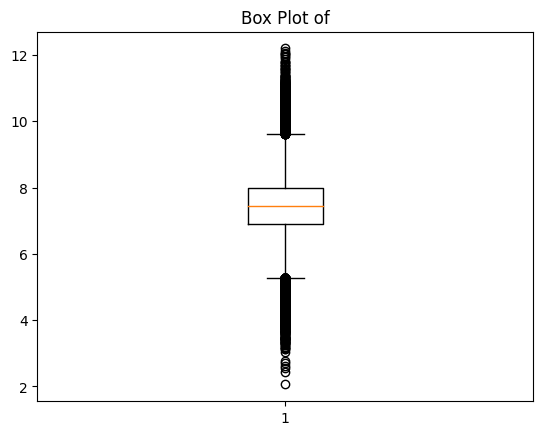


Column: Iron
Lower Bound: -0.07409138800000001
Upper Bound: 0.1235105


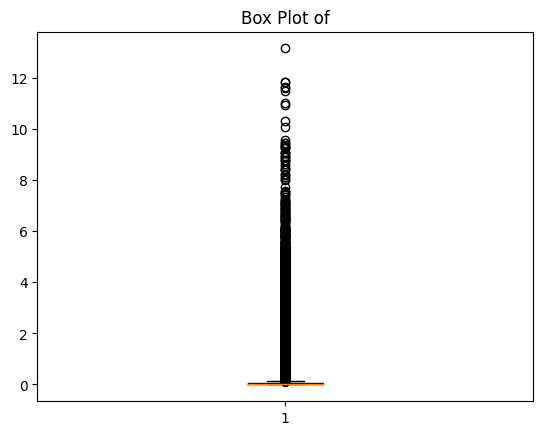


Column: Nitrate
Lower Bound: -1.509240262
Upper Bound: 13.049264582


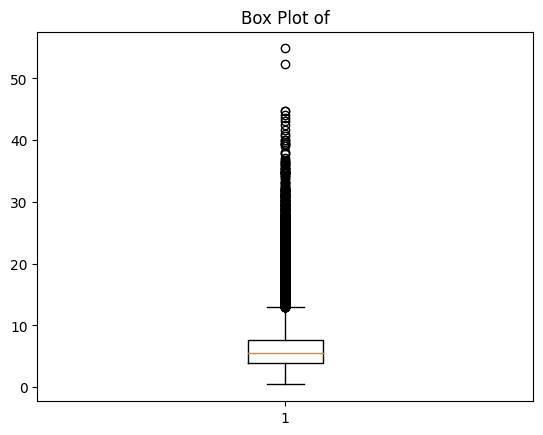


Column: Chloride
Lower Bound: 20.639284374999974
Upper Bound: 332.48622617500007


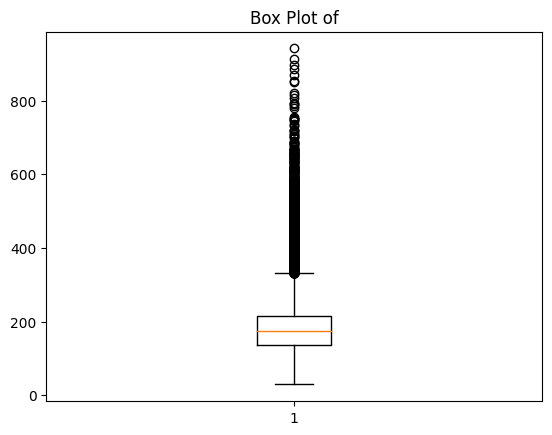


Column: Turbidity
Lower Bound: -0.7919234474999999
Upper Bound: 1.4193909605


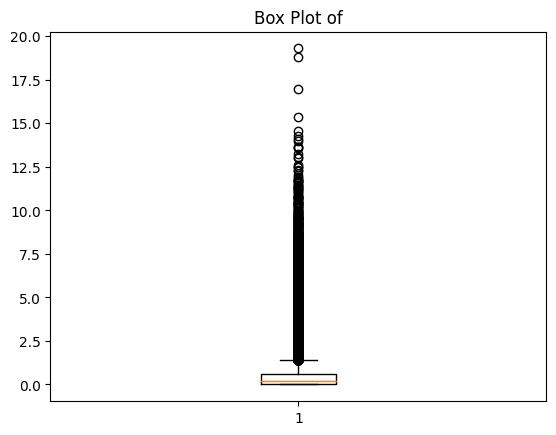


Column: Fluoride
Lower Bound: -1.056111902
Upper Bound: 2.7469656980000003


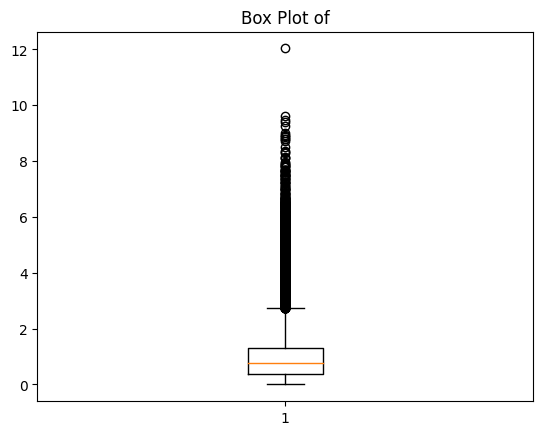


Column: Copper
Lower Bound: -0.7049062615000001
Upper Bound: 1.5096154225


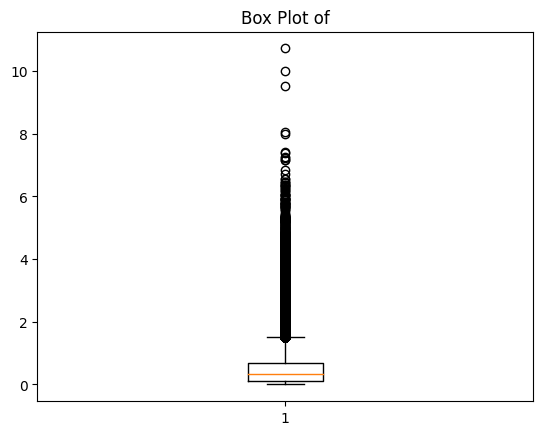


Column: Odor
Lower Bound: -1.73394244625
Upper Bound: 5.22106725175


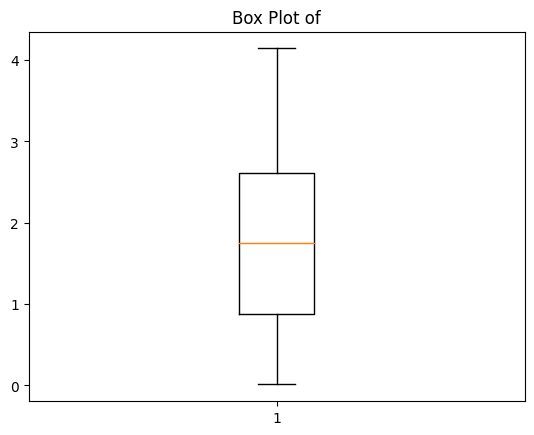


Column: Sulfate
Lower Bound: -27.116280150000023
Upper Bound: 305.29906505


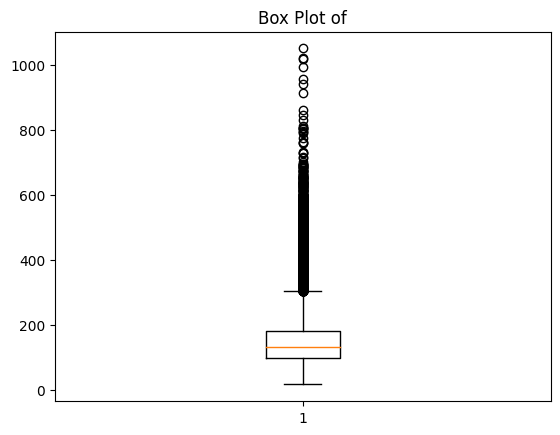


Column: Conductivity
Lower Bound: -82.94891354999987
Upper Bound: 902.5662040499998


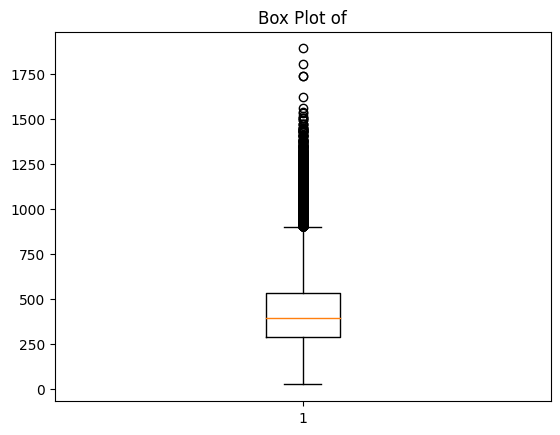


Column: Chlorine
Lower Bound: 1.3225556232500004
Upper Bound: 5.10472109725


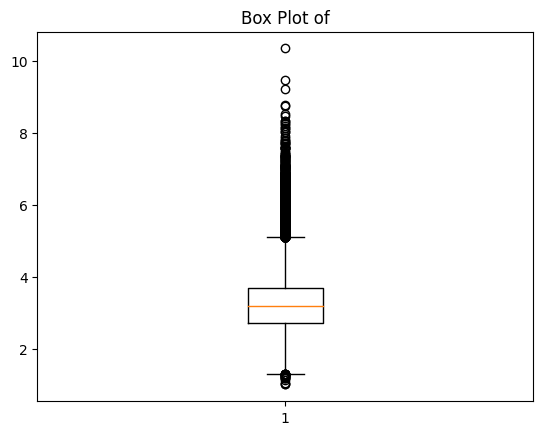


Column: Manganese
Lower Bound: -0.020503209999999997
Upper Bound: 0.034177269999999996


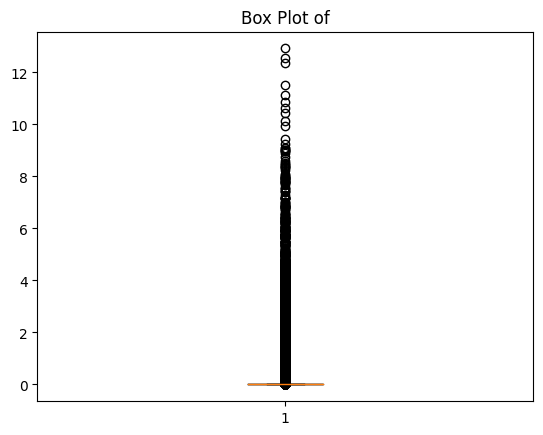


Column: Total Dissolved Solids
Lower Bound: -262.294045475
Upper Bound: 789.415533925


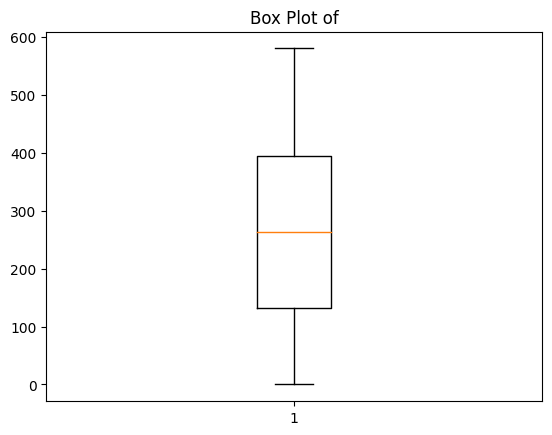


Column: Water Temperature
Lower Bound: -7.540365592499999
Upper Bound: 42.6731593075


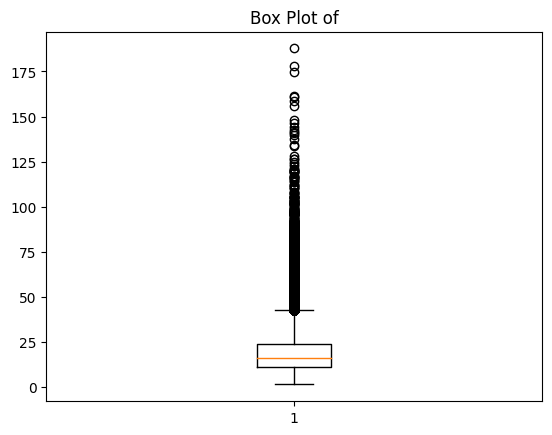


Column: Air Temperature
Lower Bound: 11.356757092499997
Upper Bound: 108.76625247250001


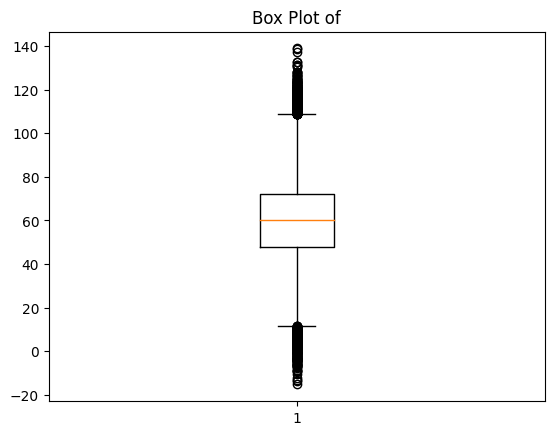


Column: Day
Lower Bound: -14.5
Upper Bound: 45.5


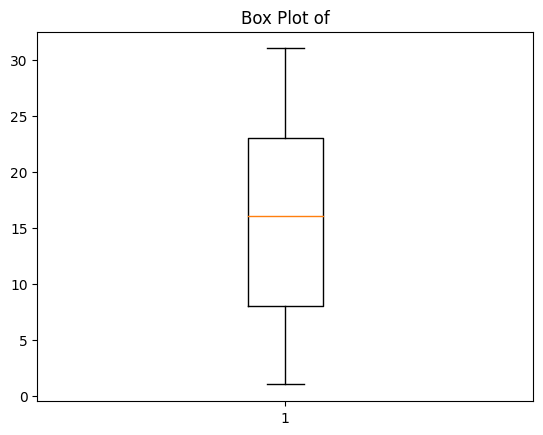

In [17]:
numeric_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Day']

# Create a dictionary to store the lower and upper bounds for each column
outlier_bounds = {}

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[column] = (lower_bound, upper_bound)

# Print the outlier boundaries for each column
for column, (lower_bound, upper_bound) in outlier_bounds.items():
    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    plt.boxplot(df[column])
    plt.title('Box Plot of')
    plt.show()
    print()

In [15]:
selected_features = df[['pH', 'Iron', 'Nitrate', 'Chloride', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Day']]
X = selected_features.to_numpy()

C:\Users\ranuja\AppData\Local\Temp\ipykernel_21020\3026621781.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


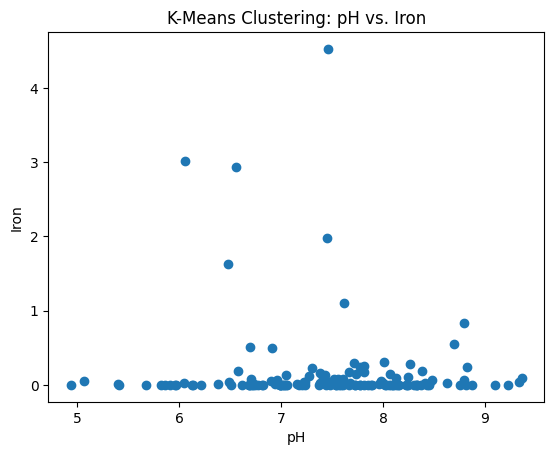

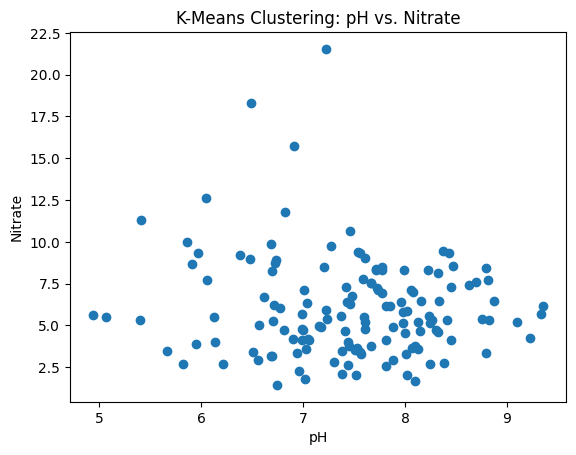

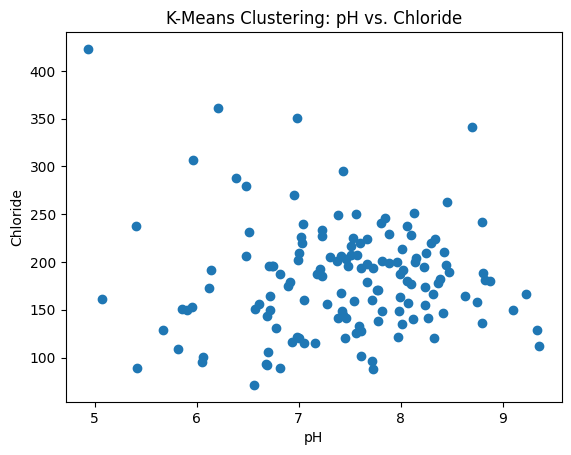

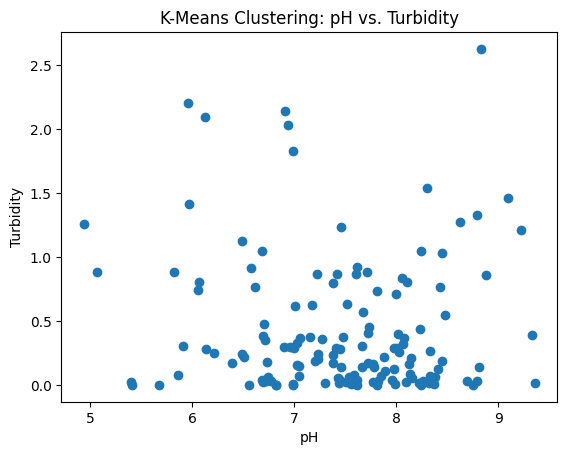

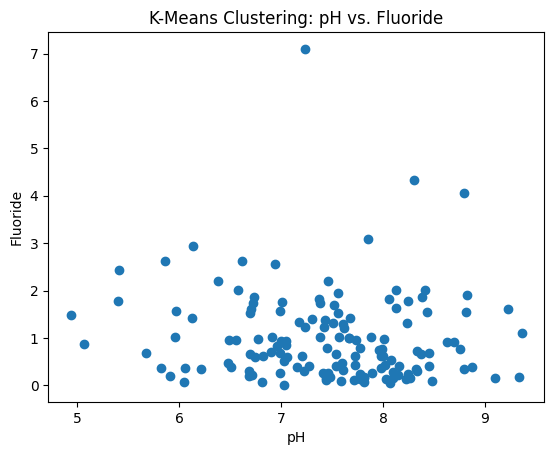

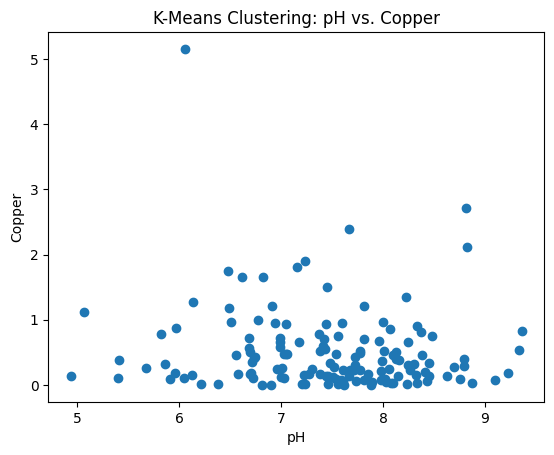

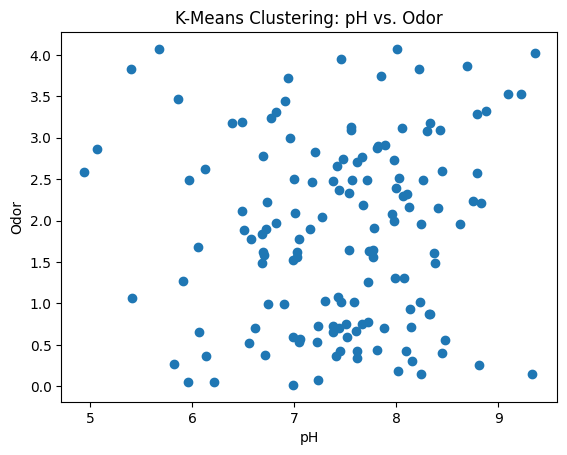

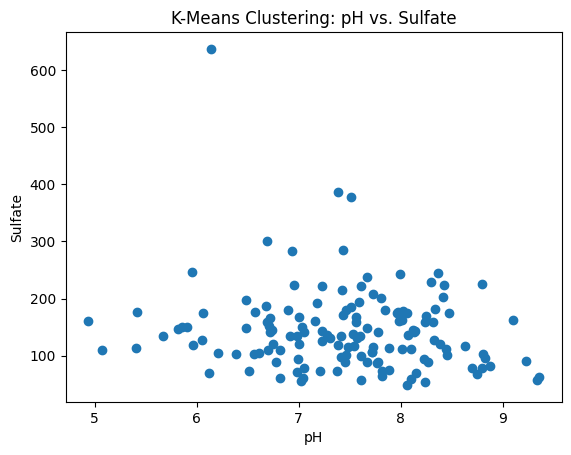

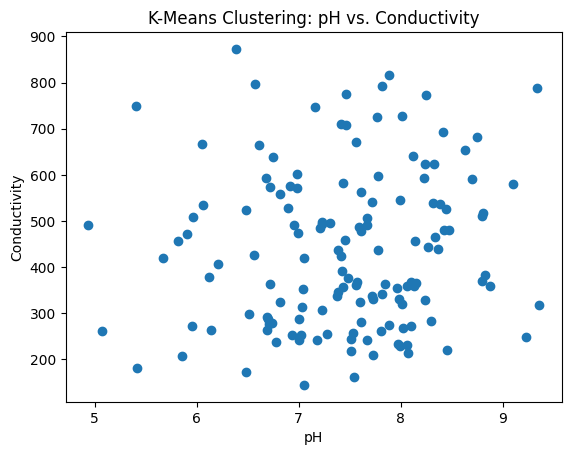

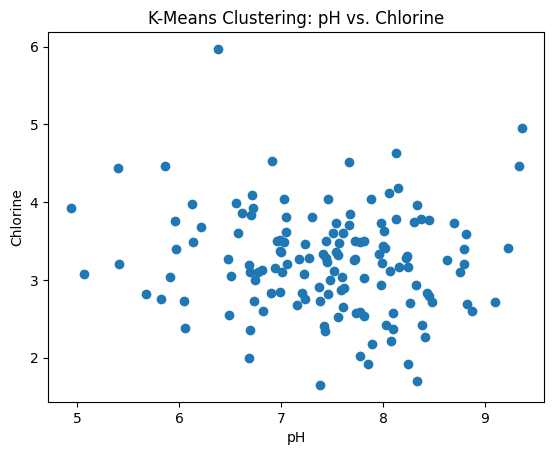

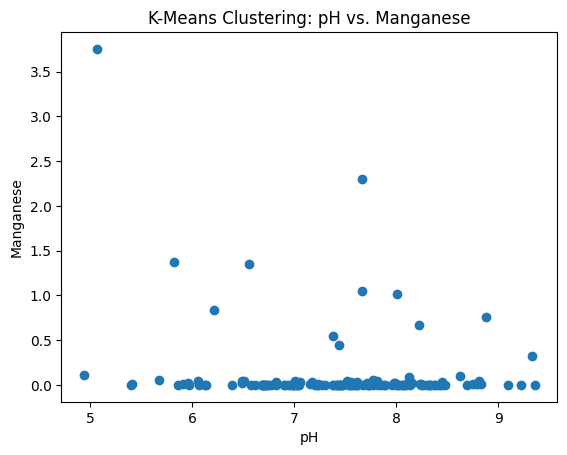

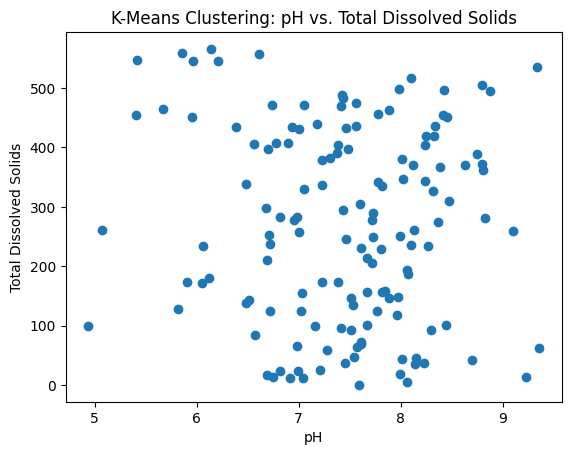

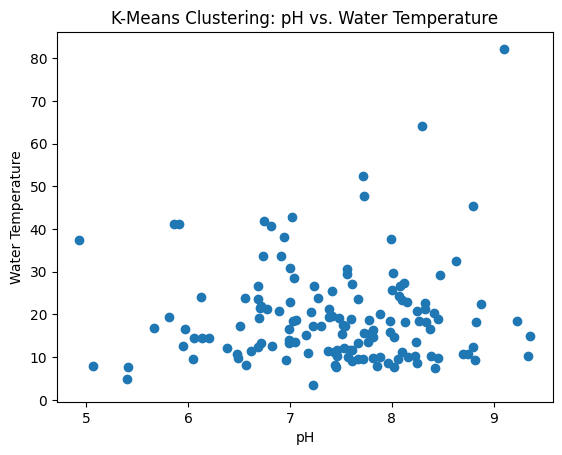

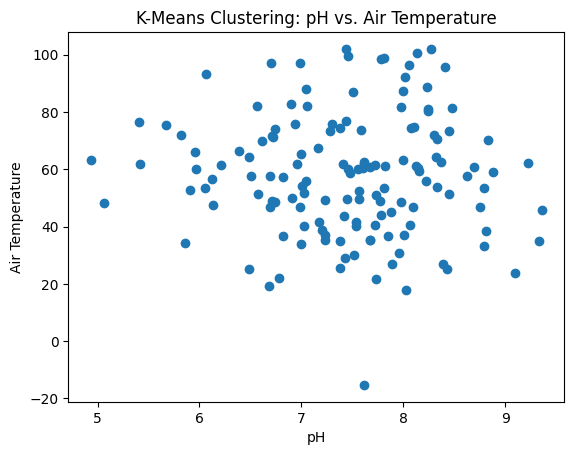

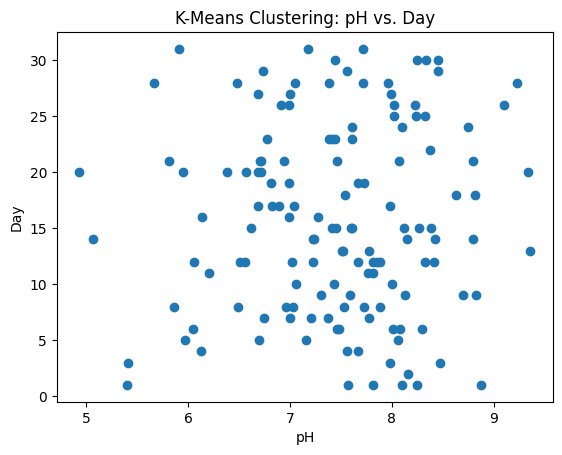

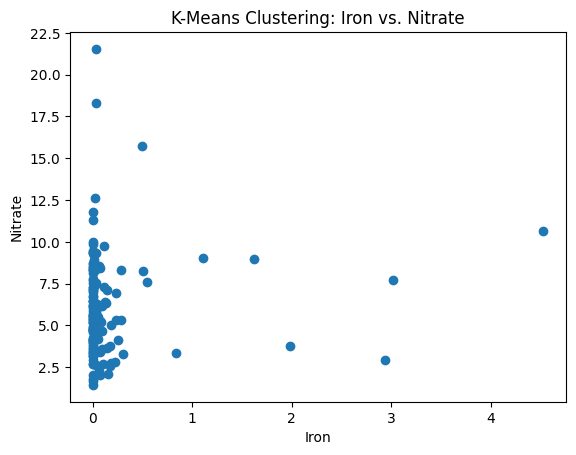

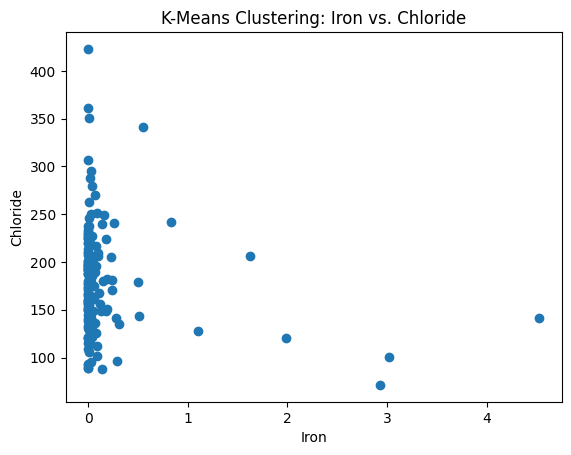

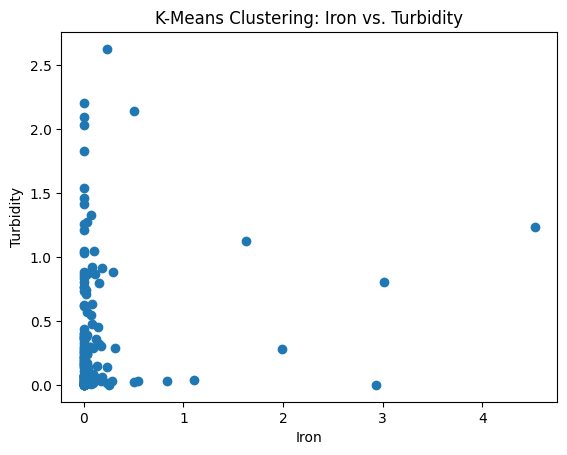

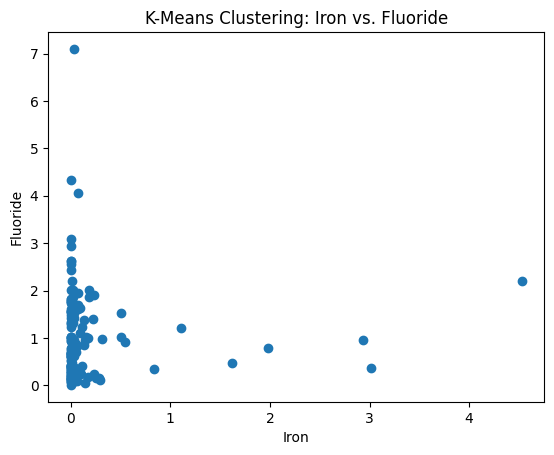

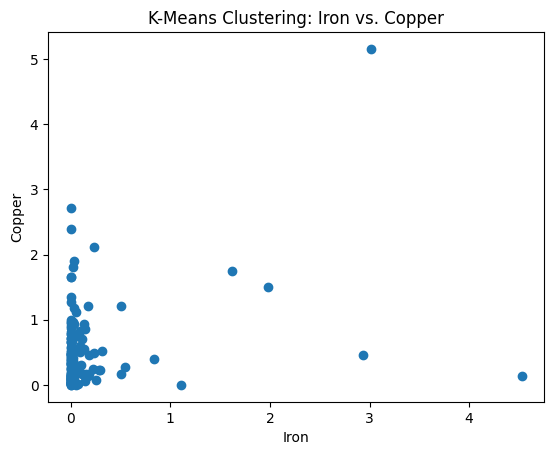

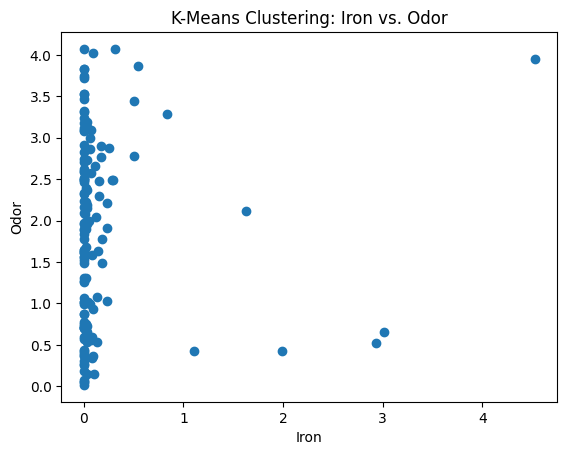

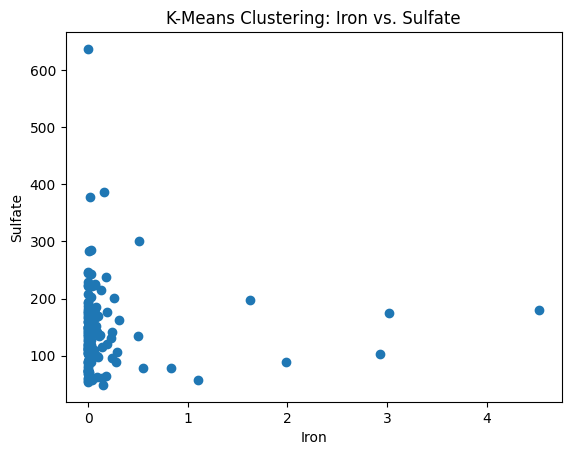

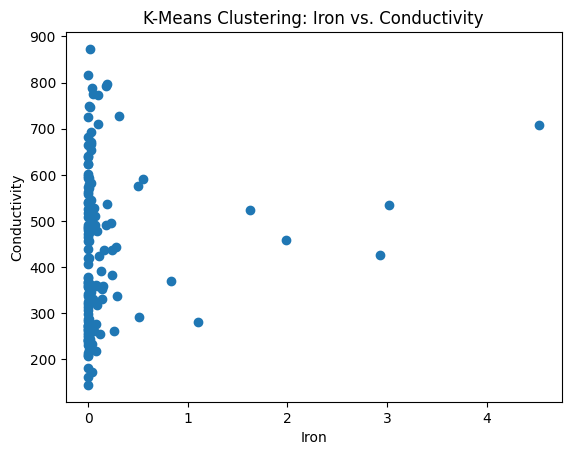

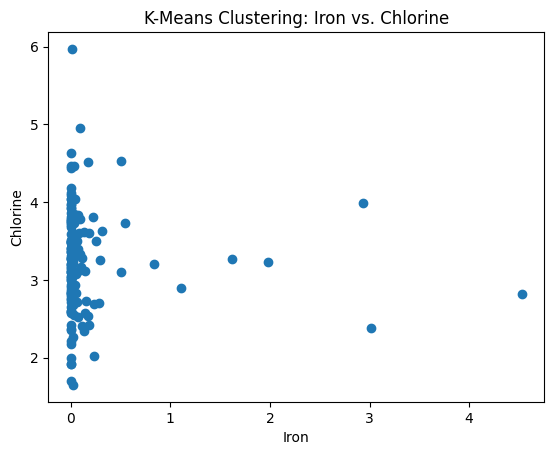

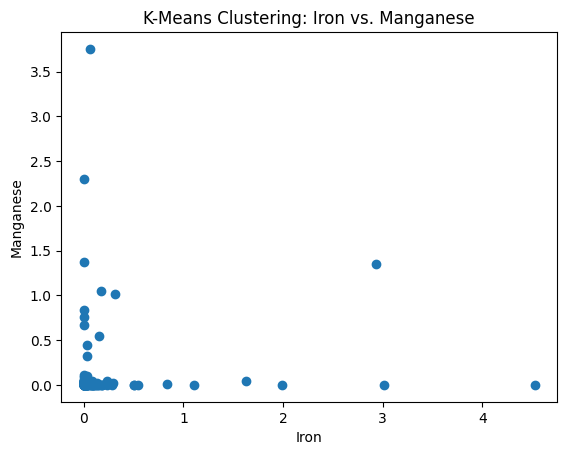

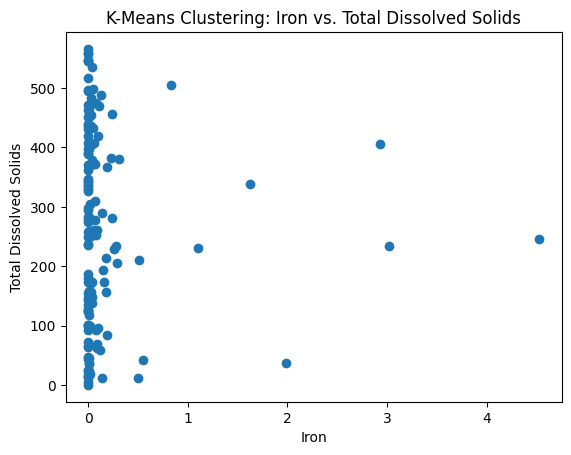

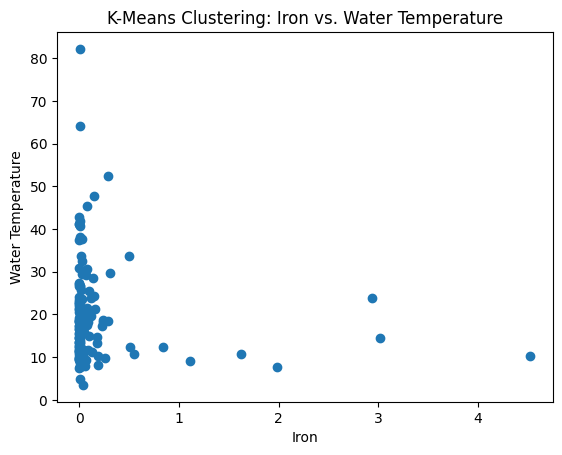

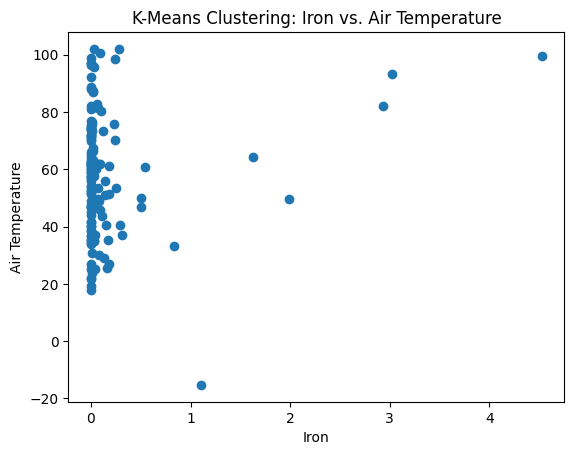

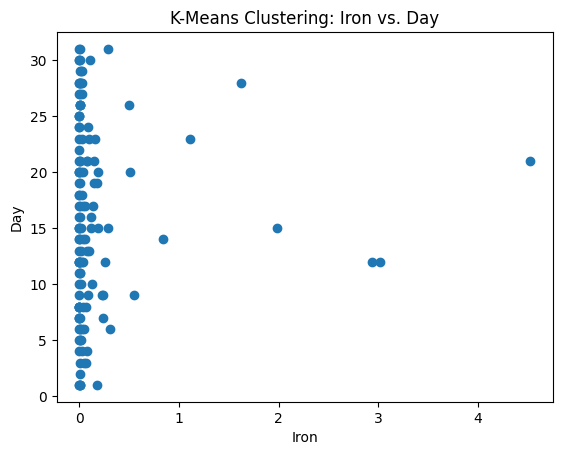

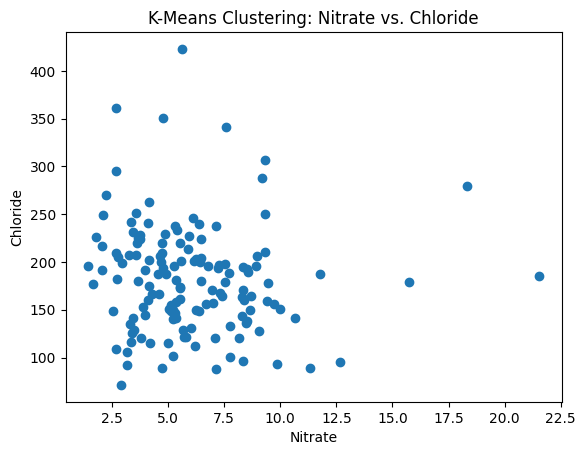

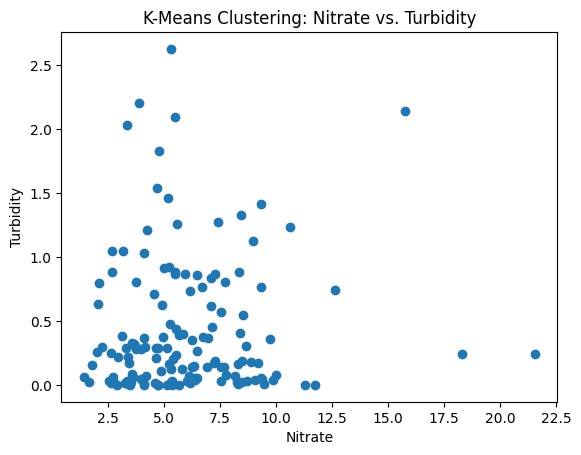

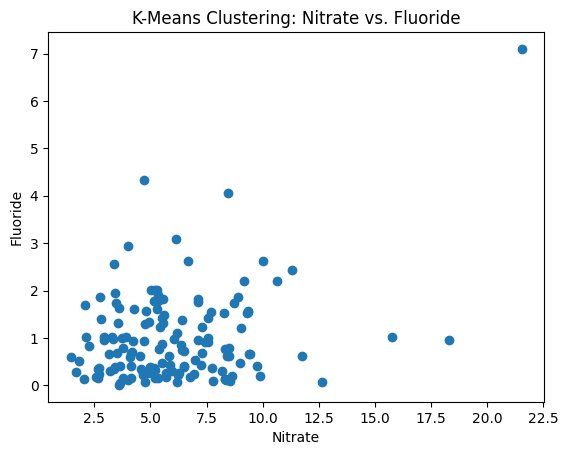

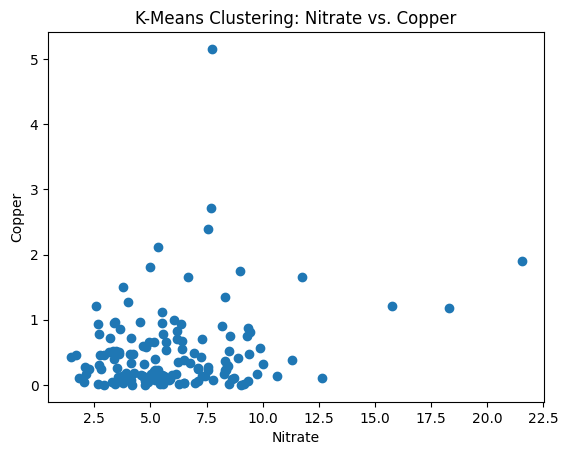

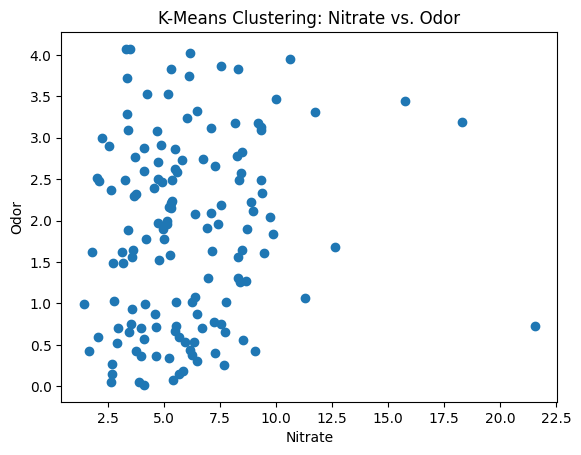

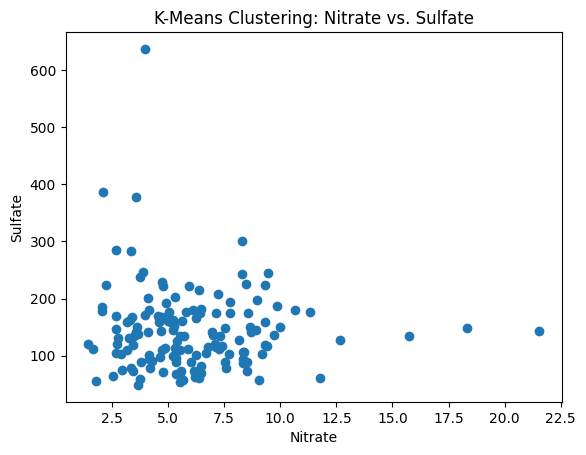

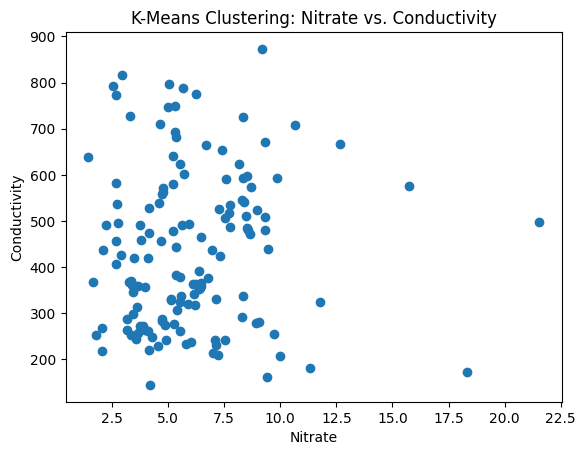

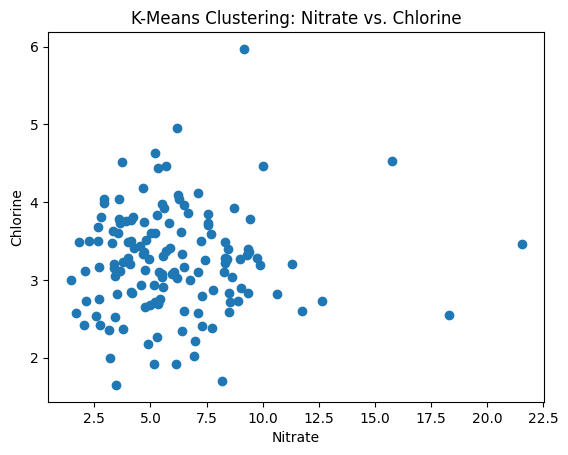

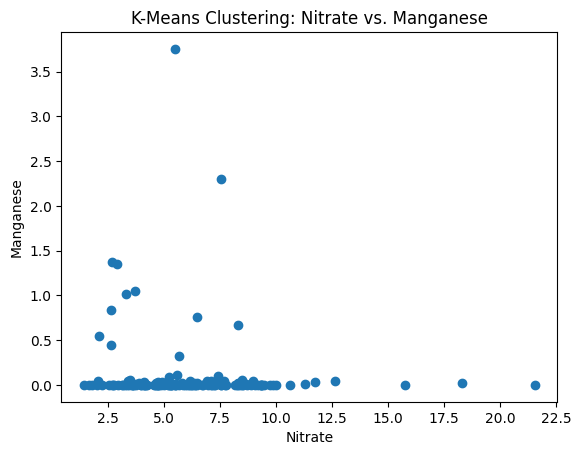

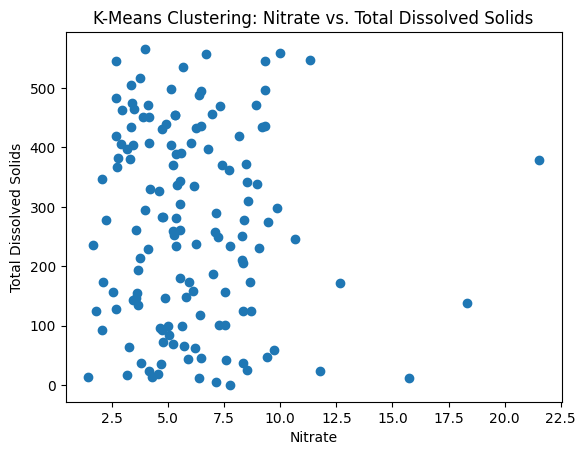

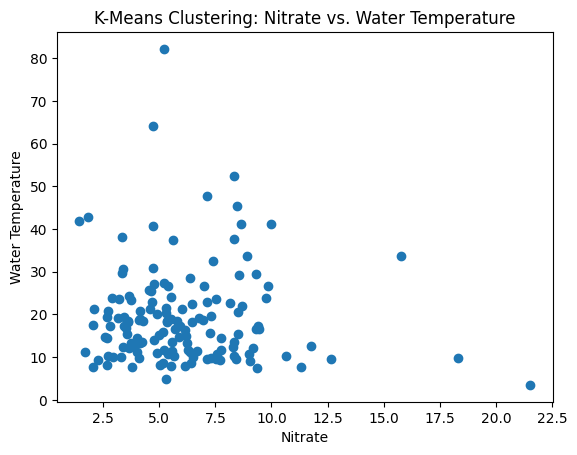

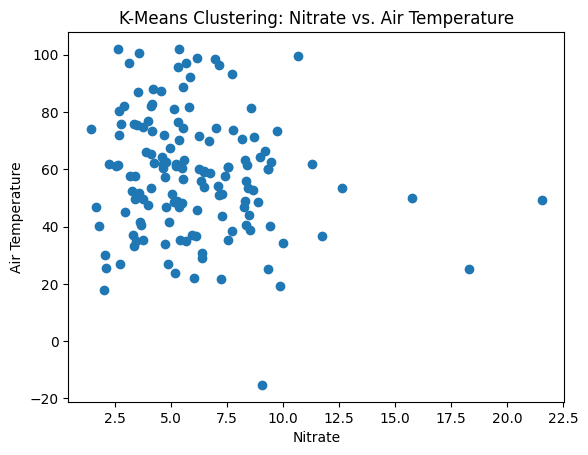

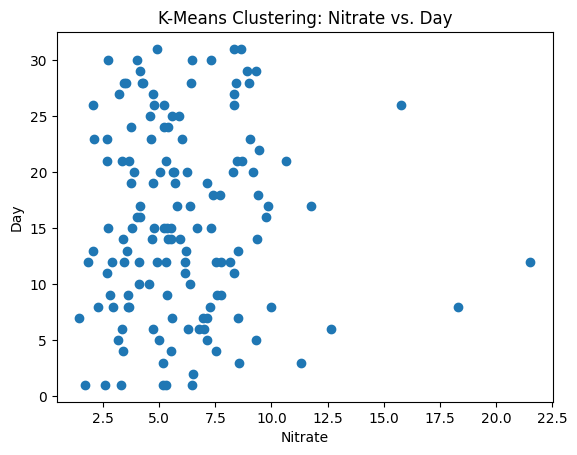

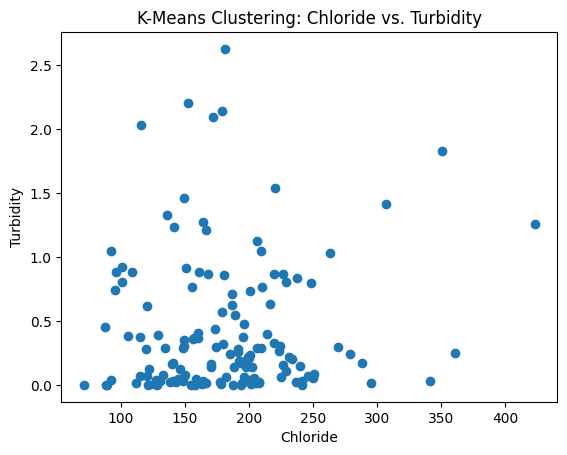

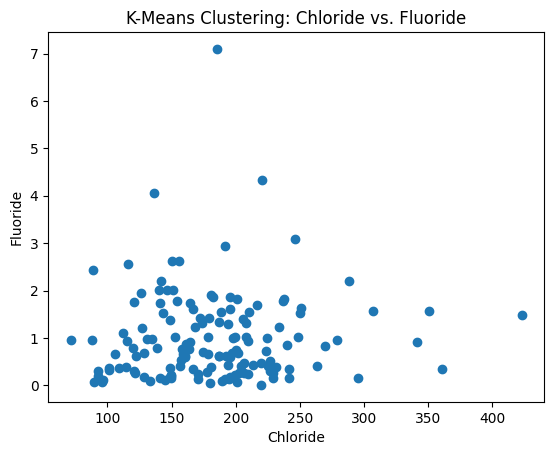

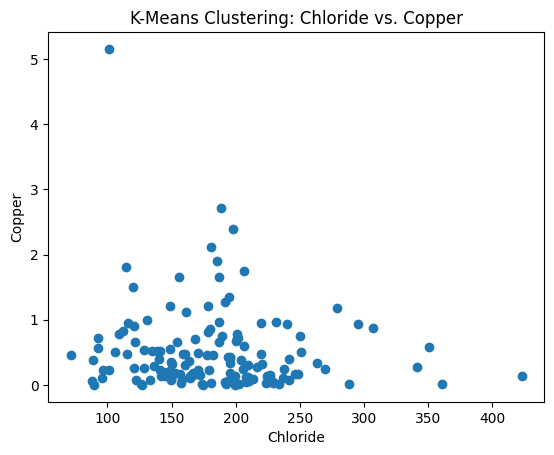

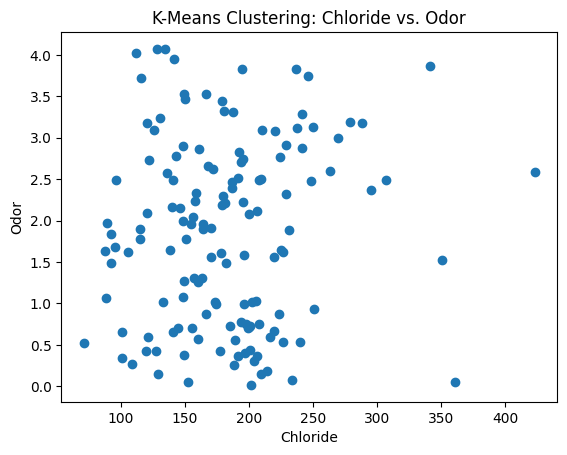

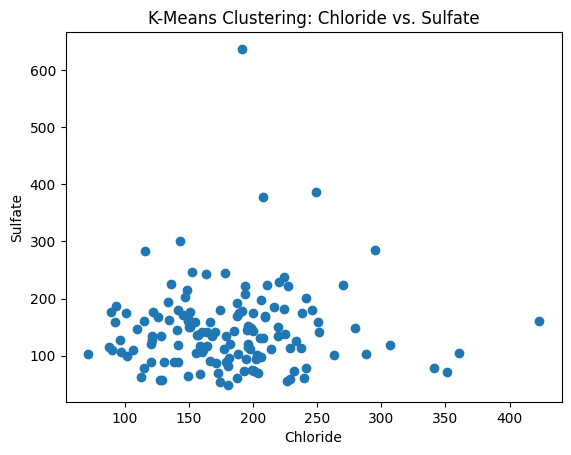

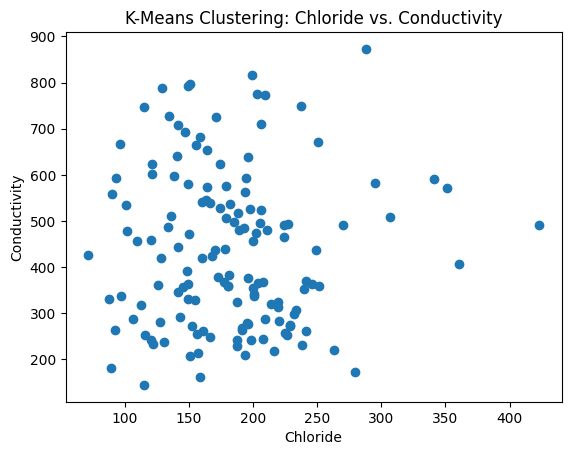

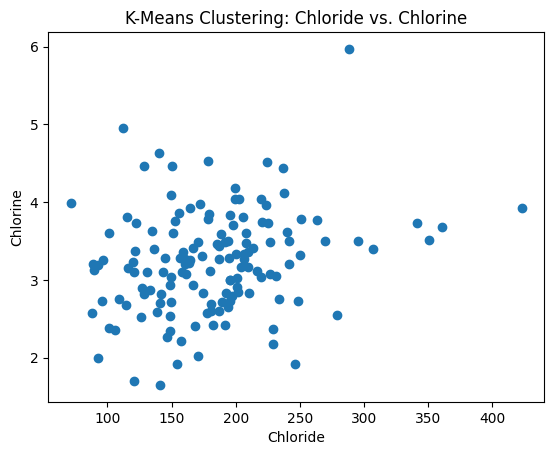

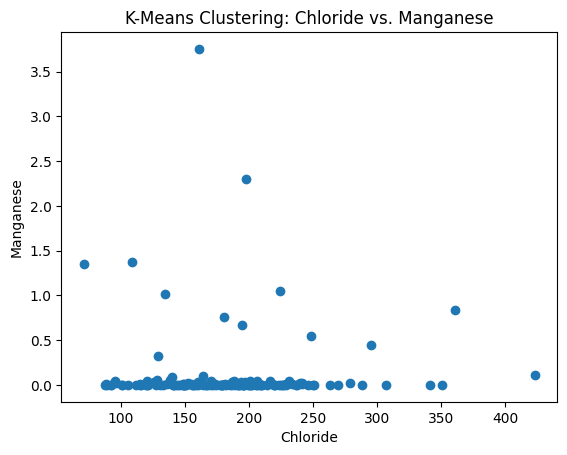

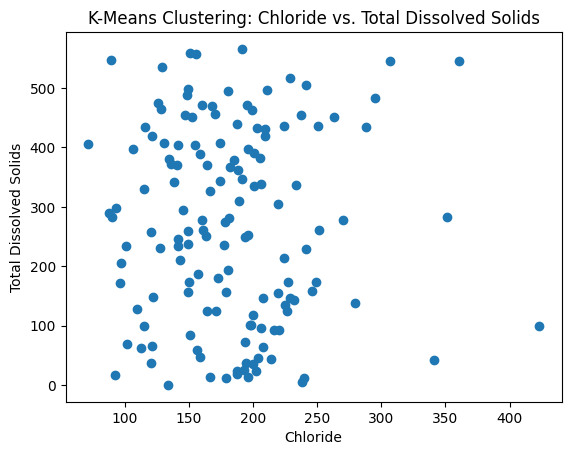

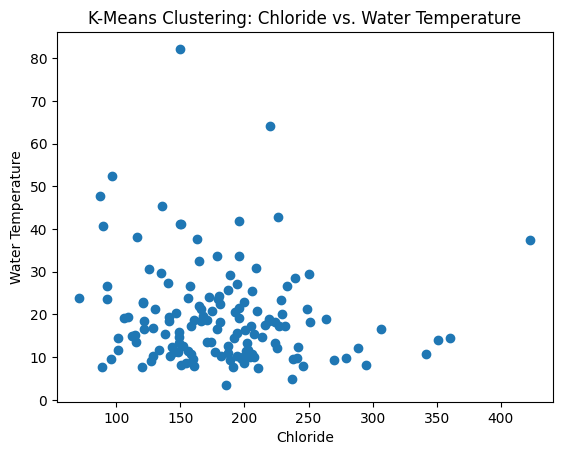

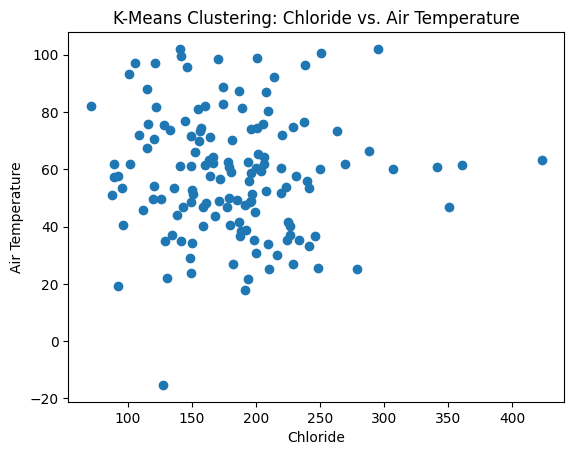

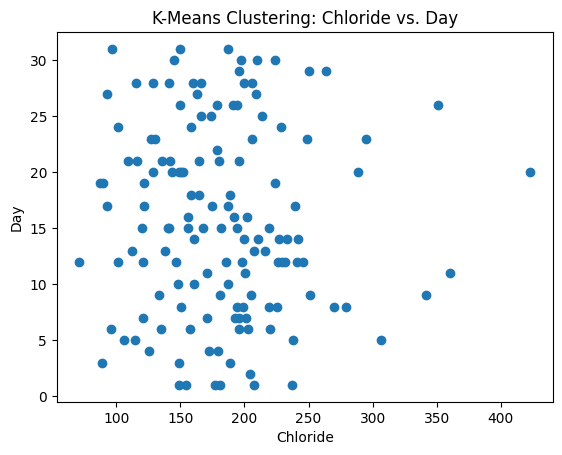

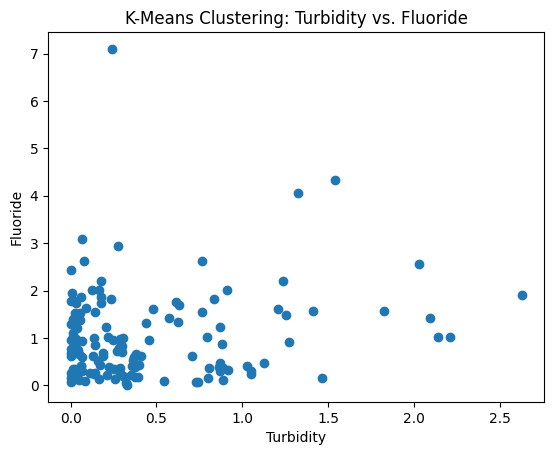

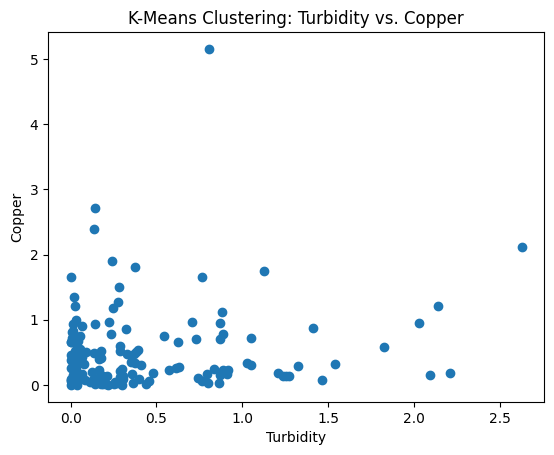

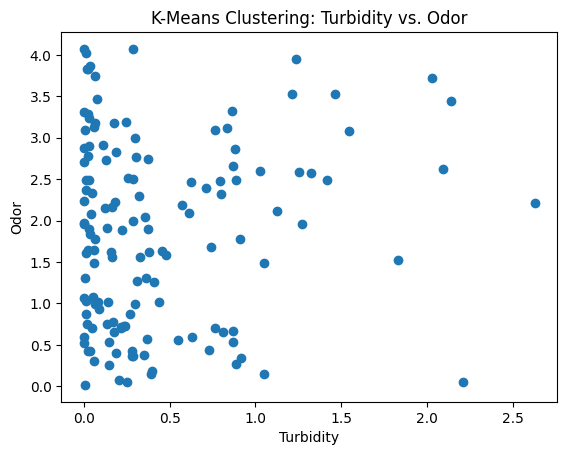

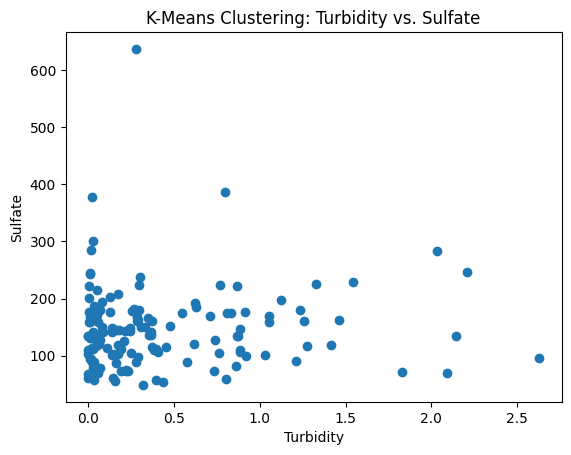

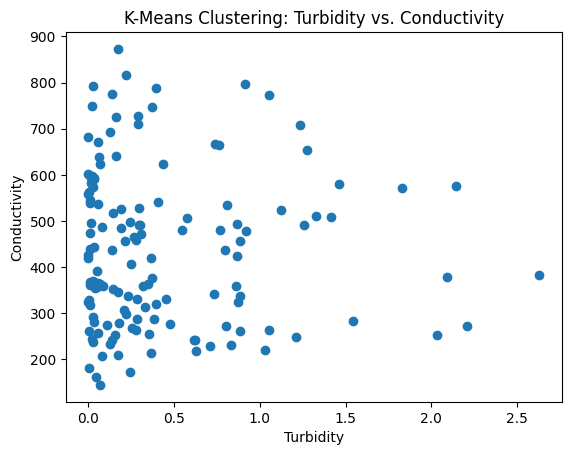

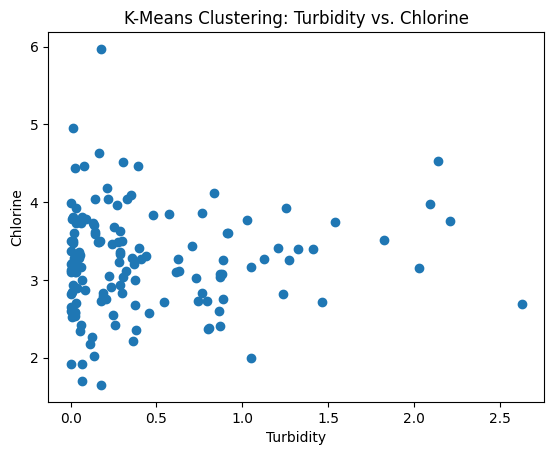

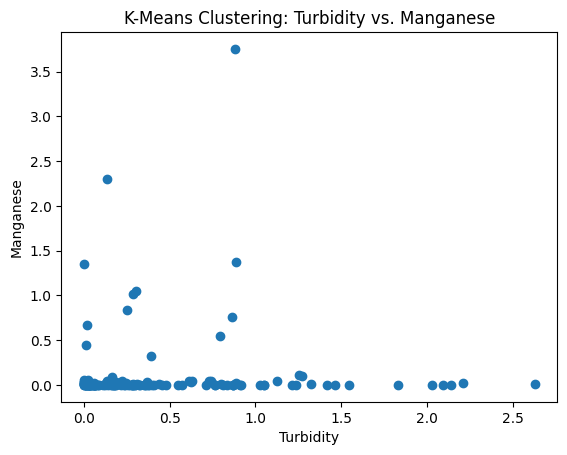

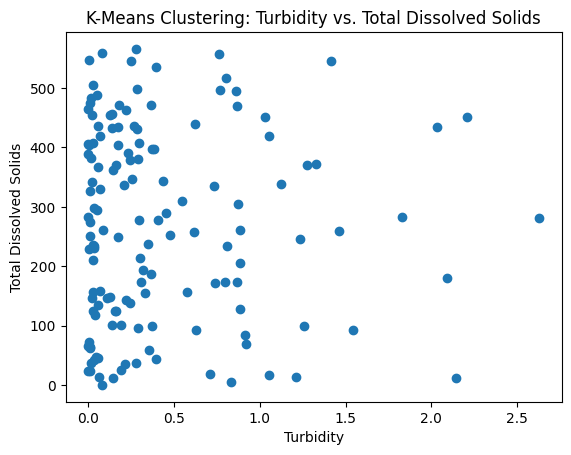

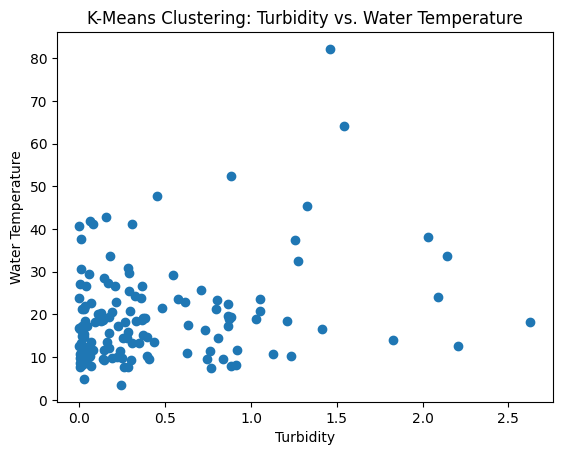

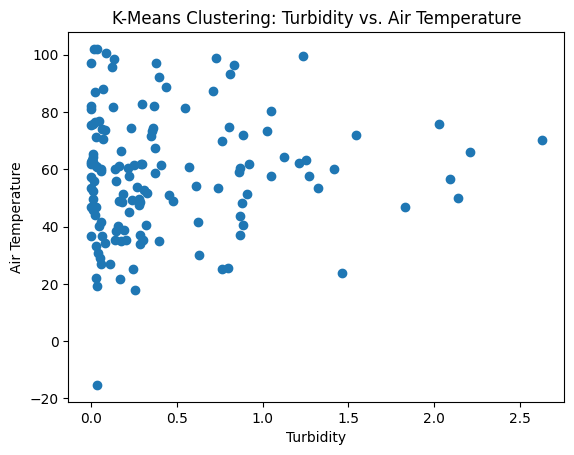

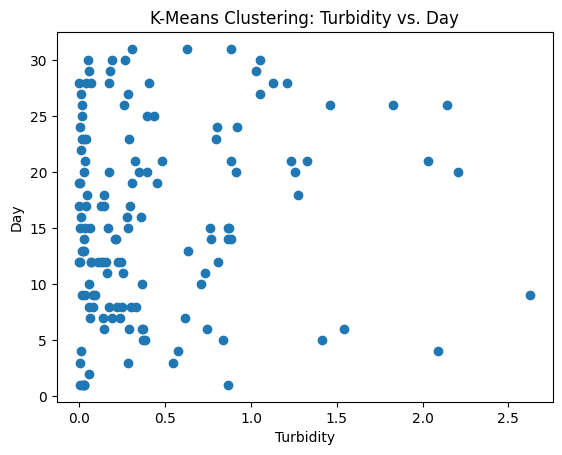

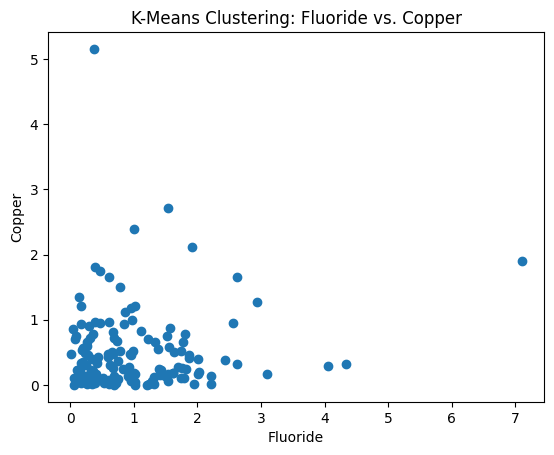

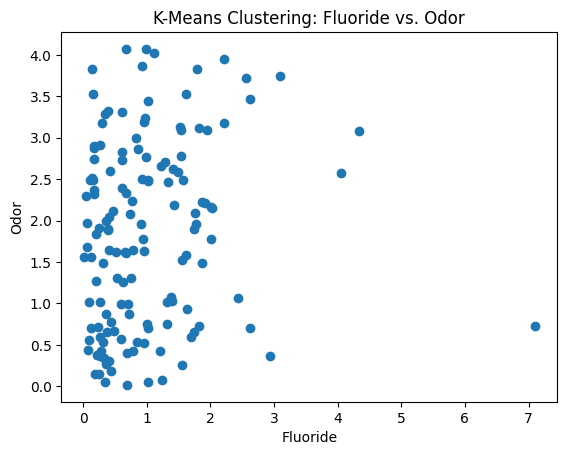

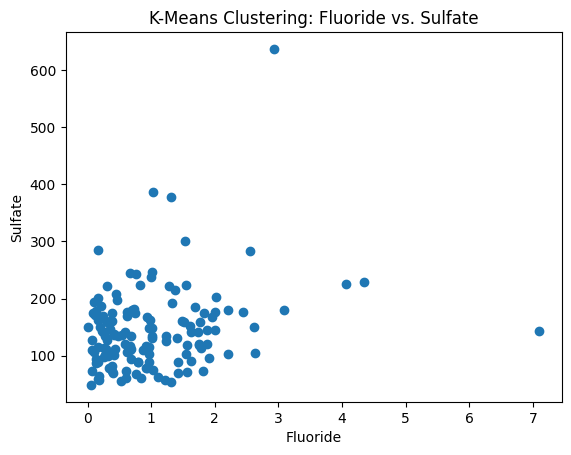

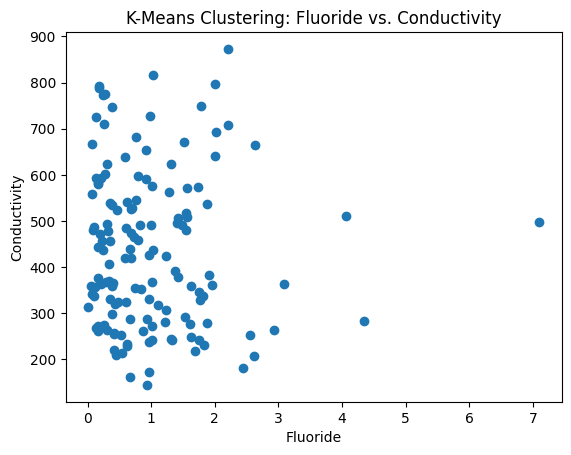

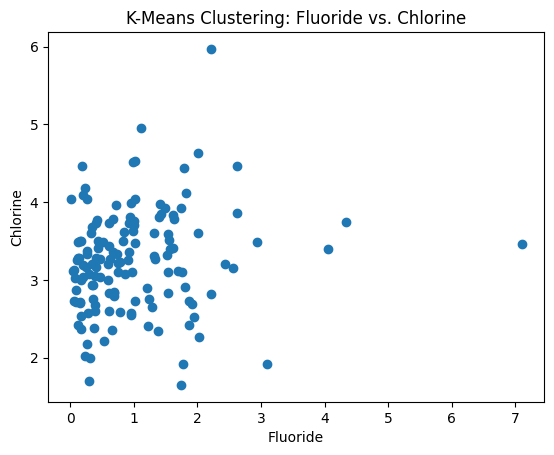

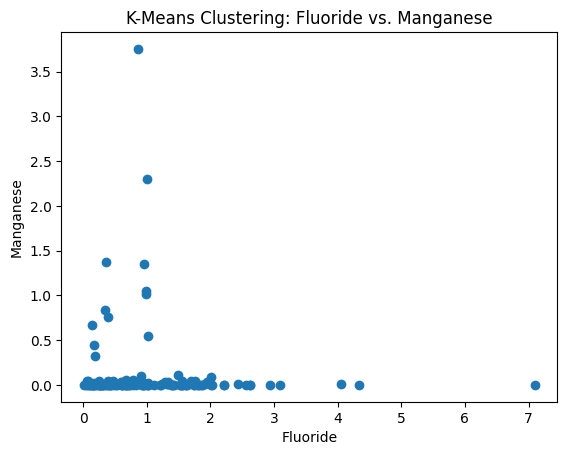

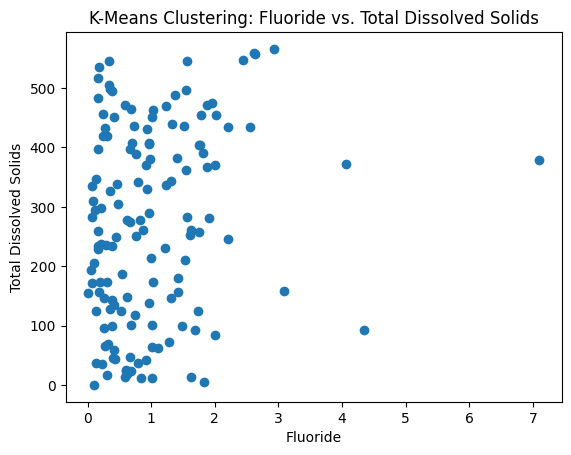

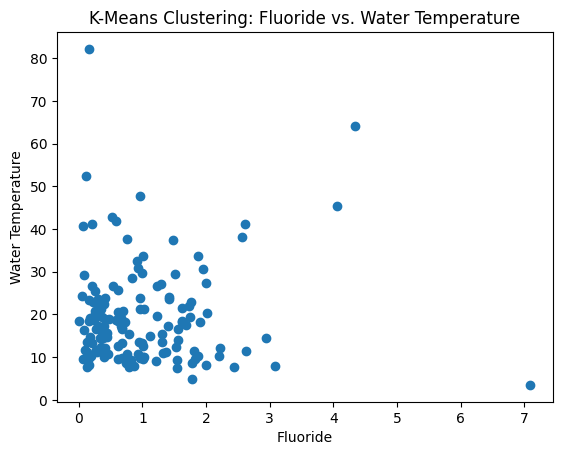

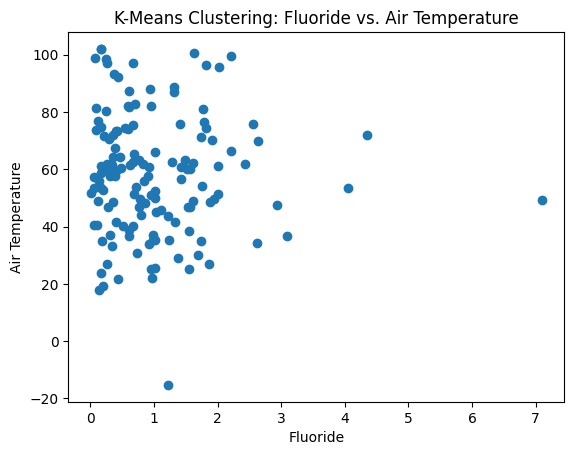

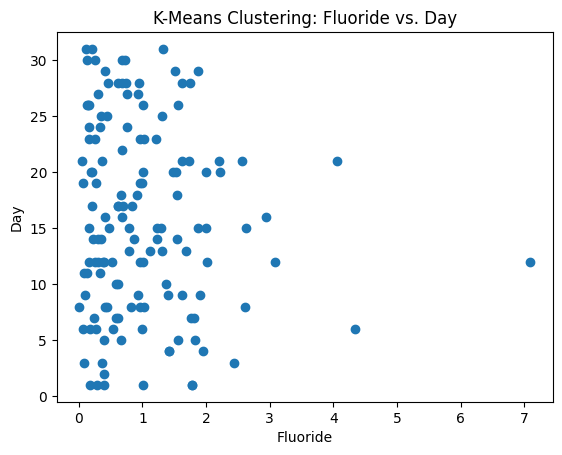

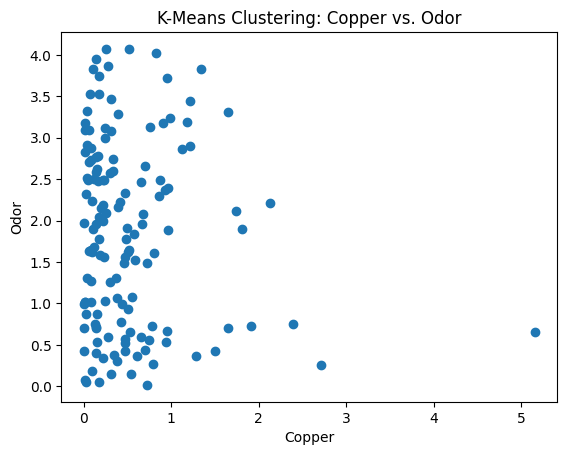

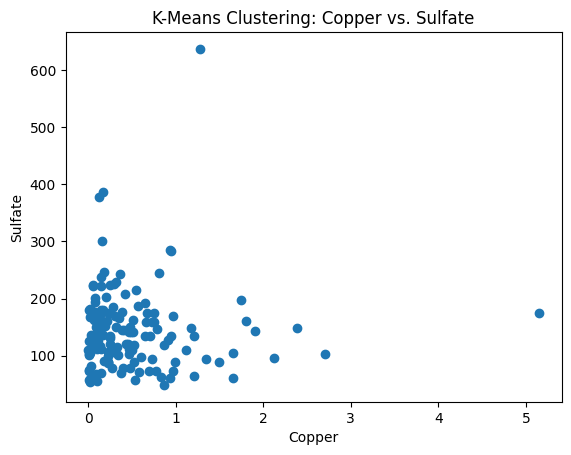

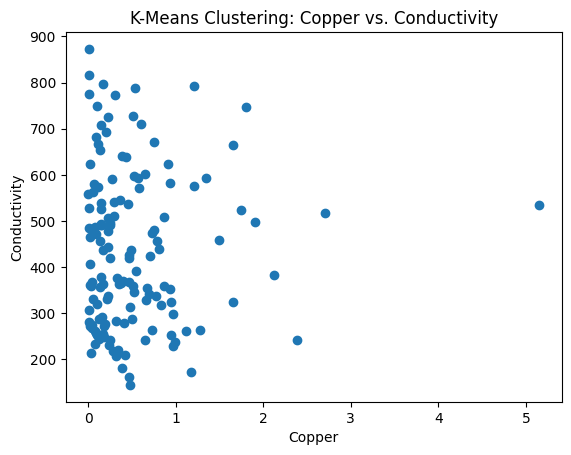

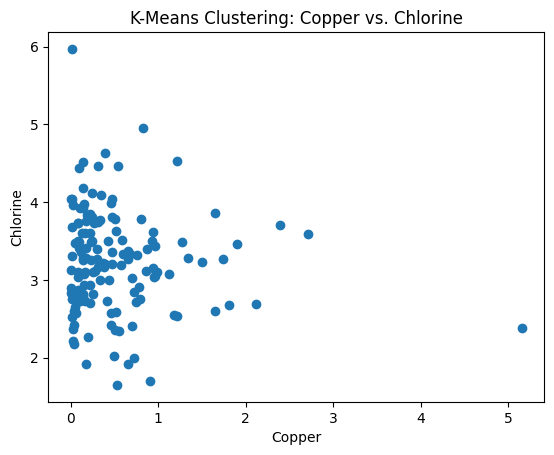

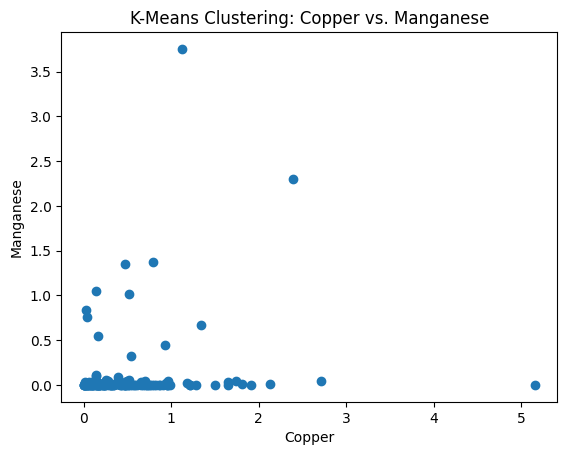

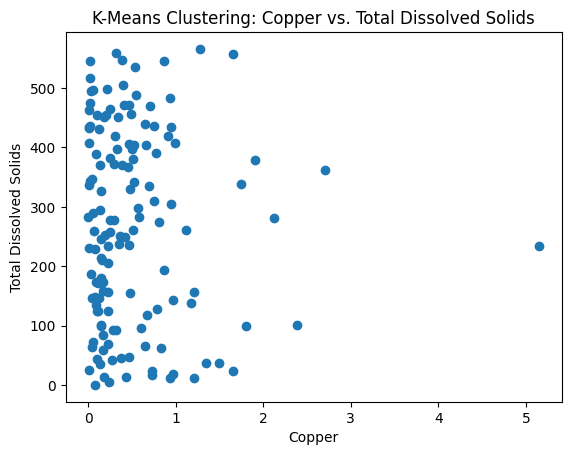

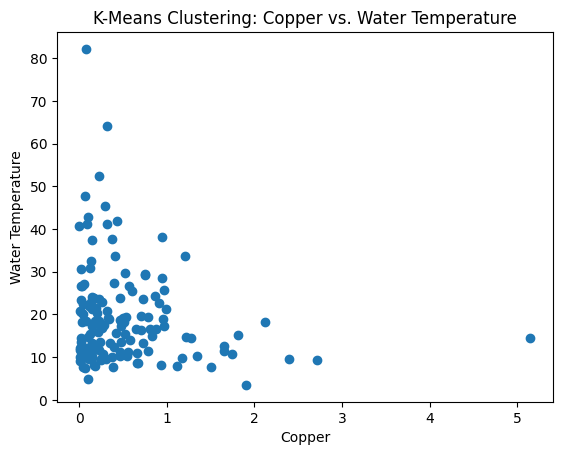

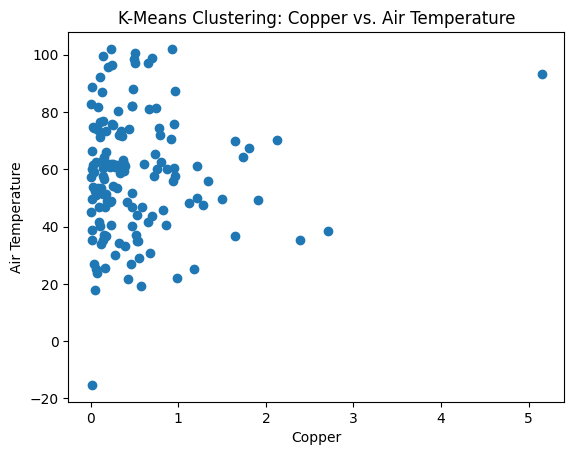

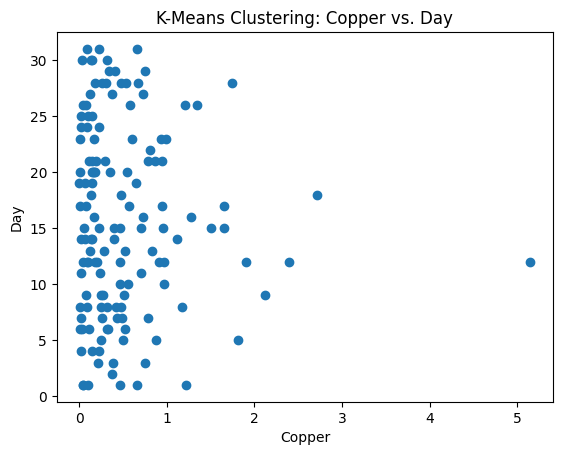

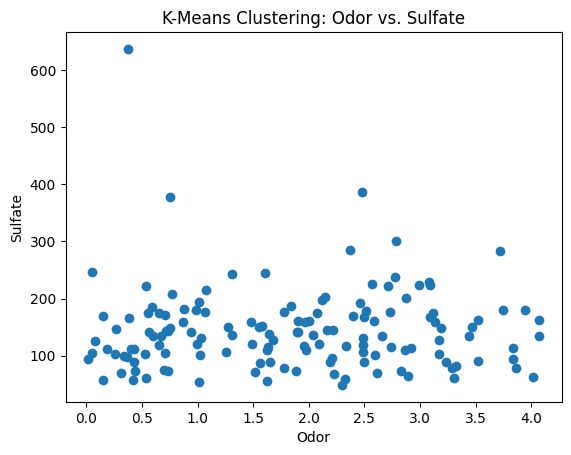

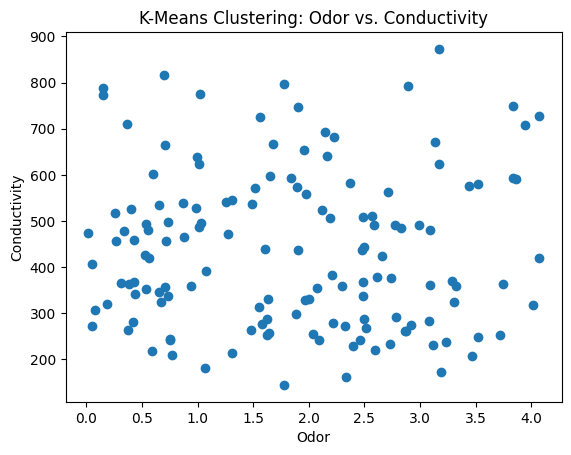

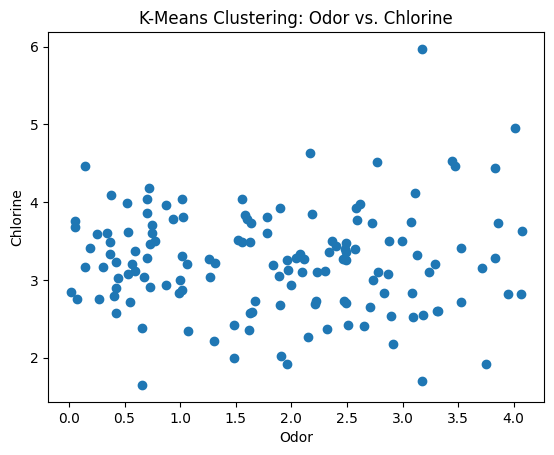

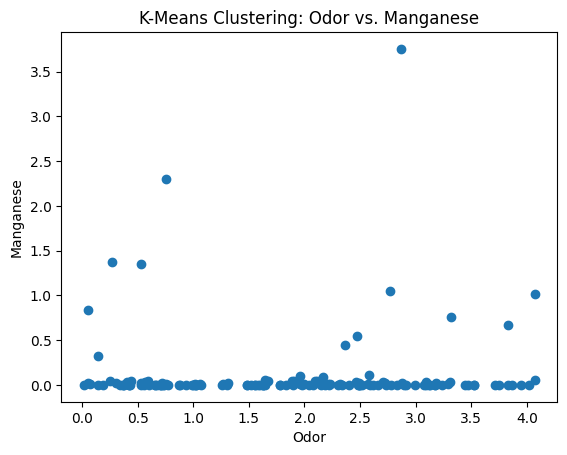

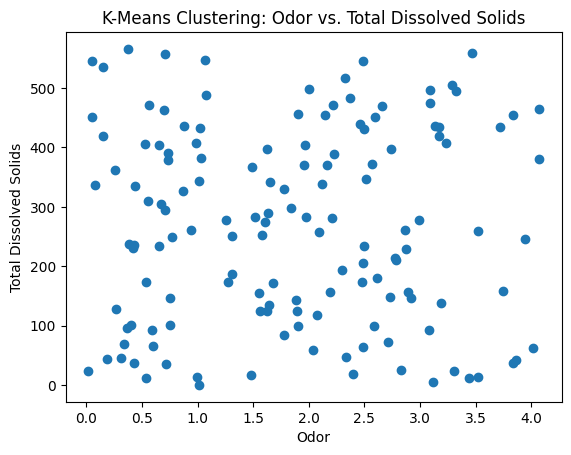

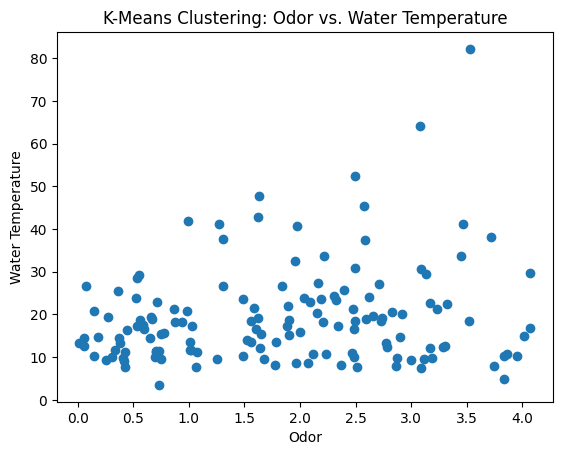

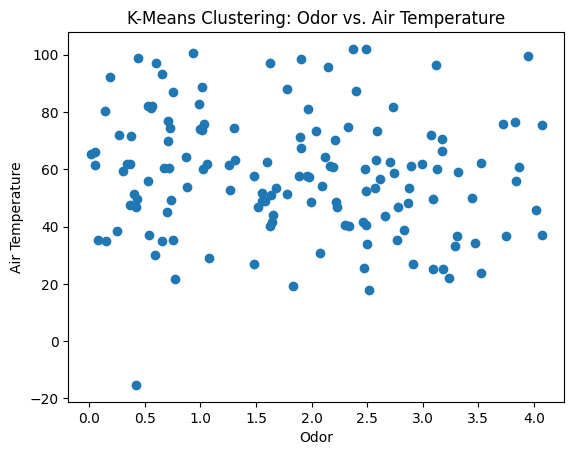

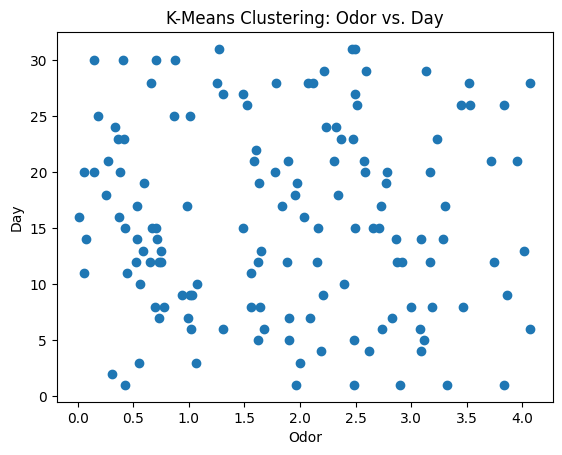

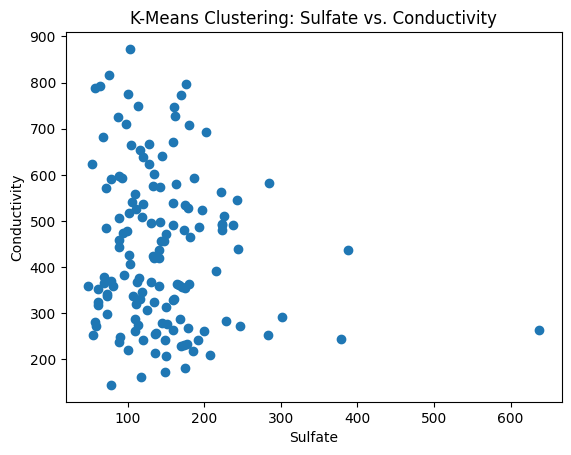

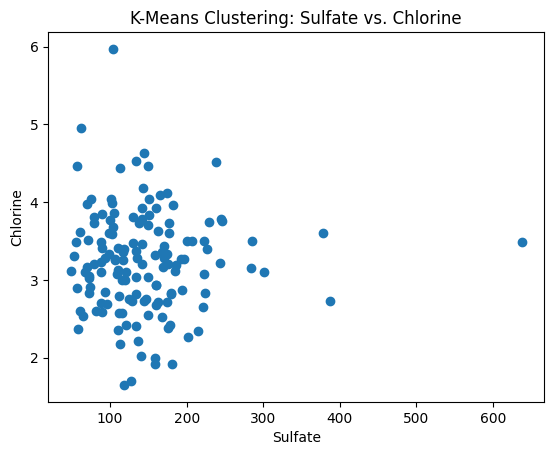

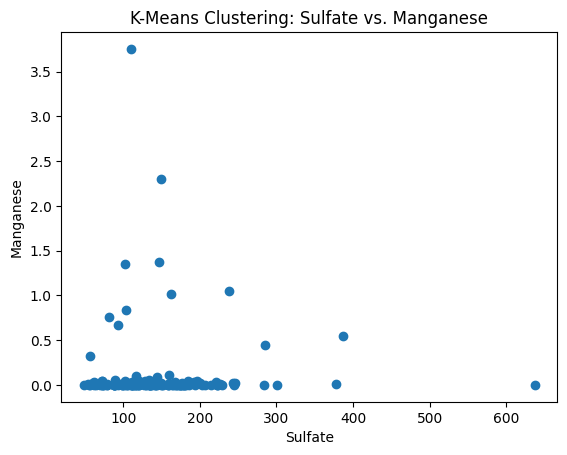

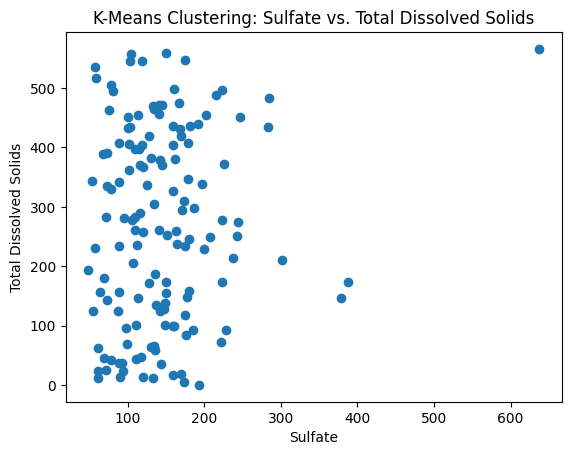

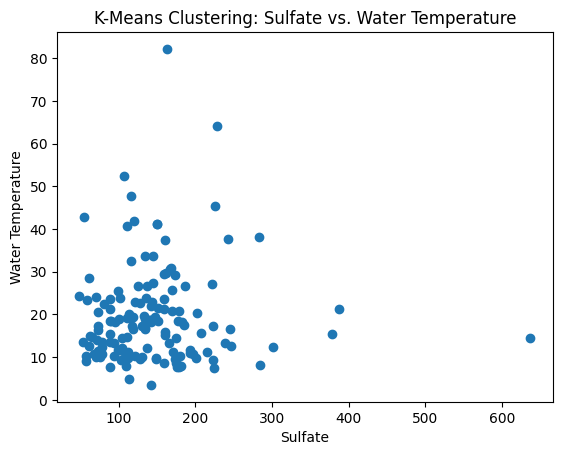

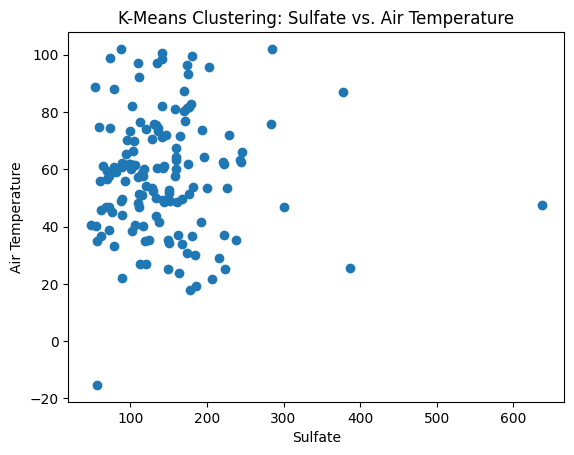

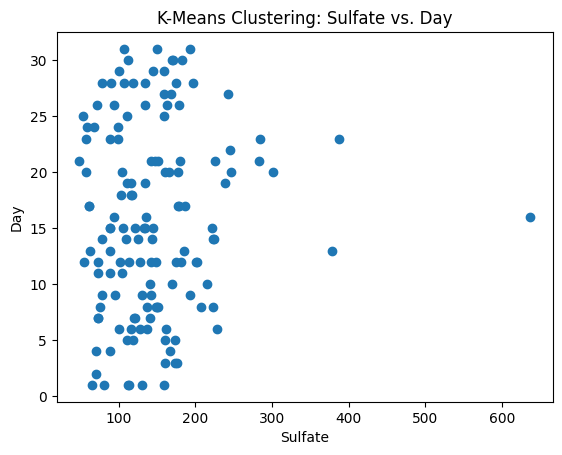

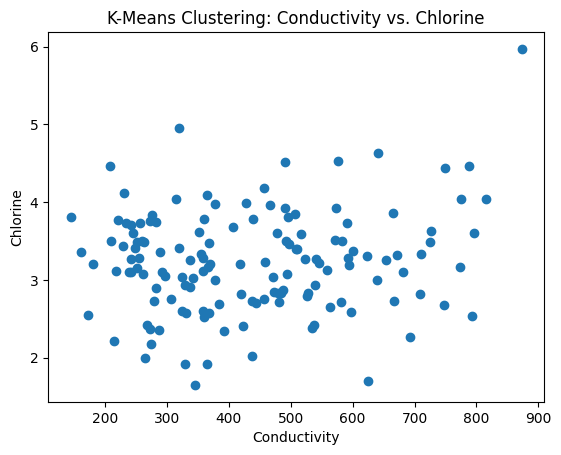

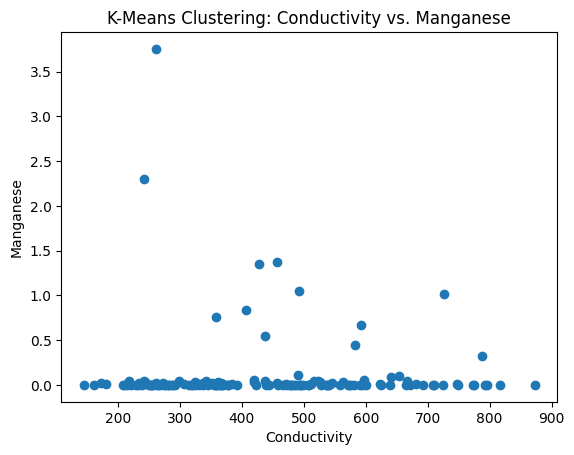

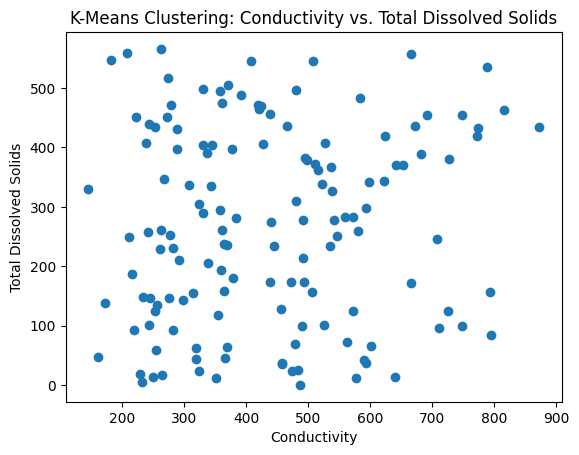

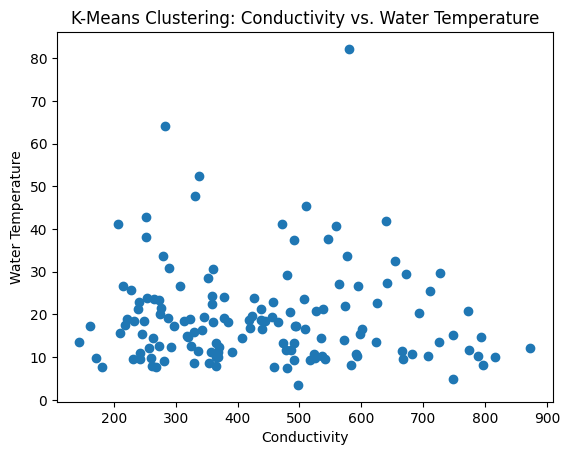

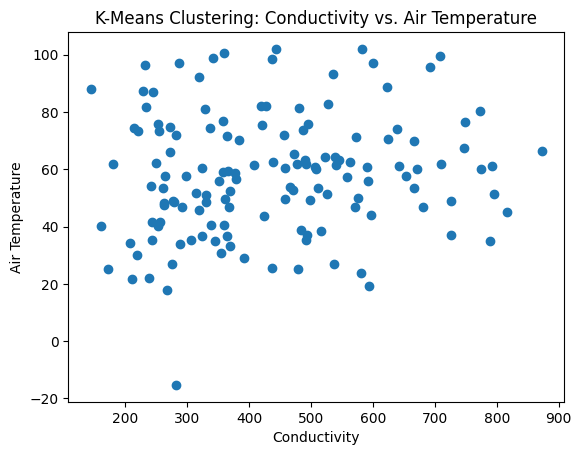

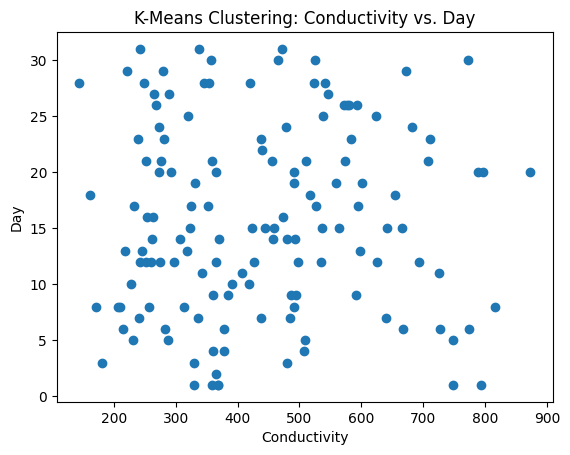

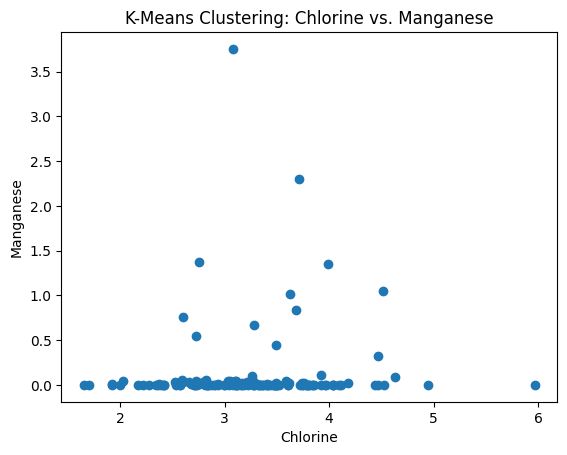

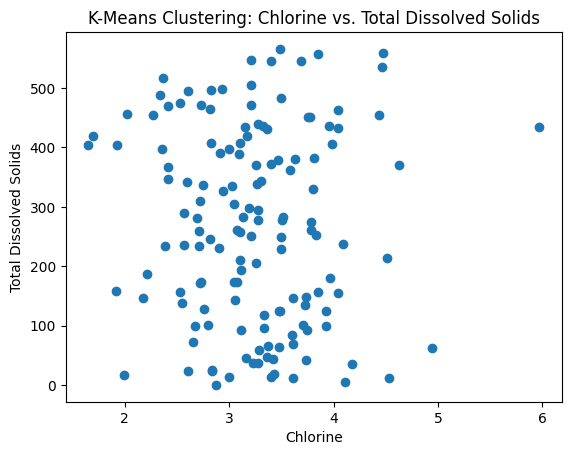

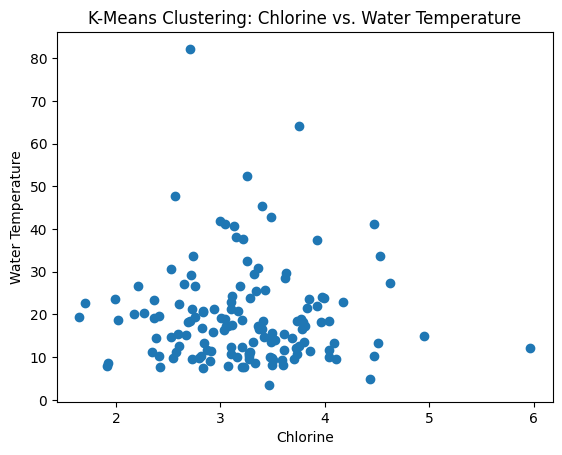

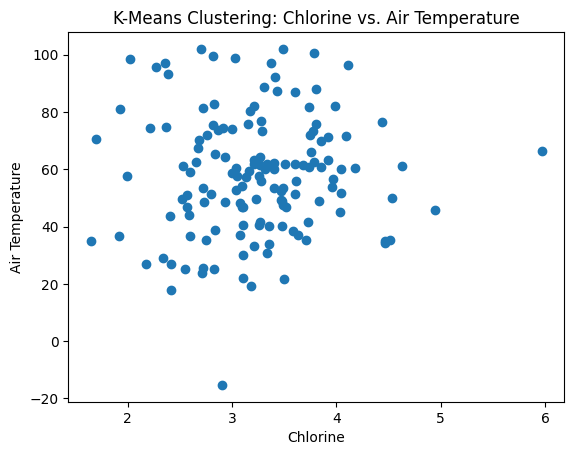

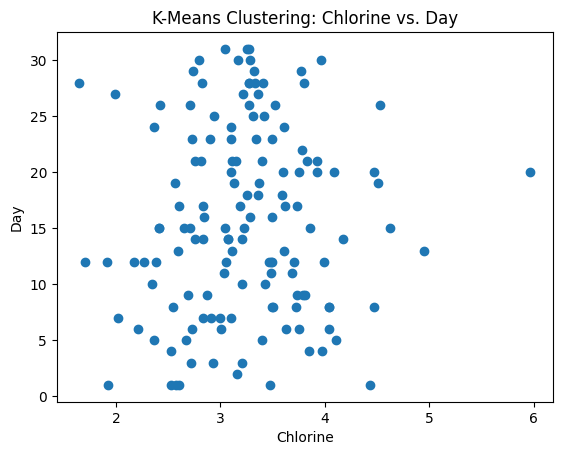

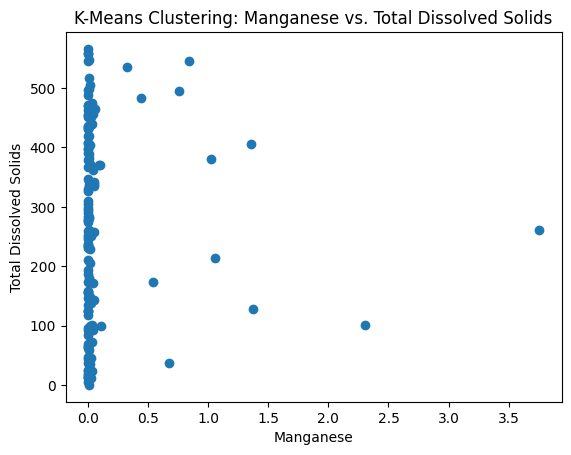

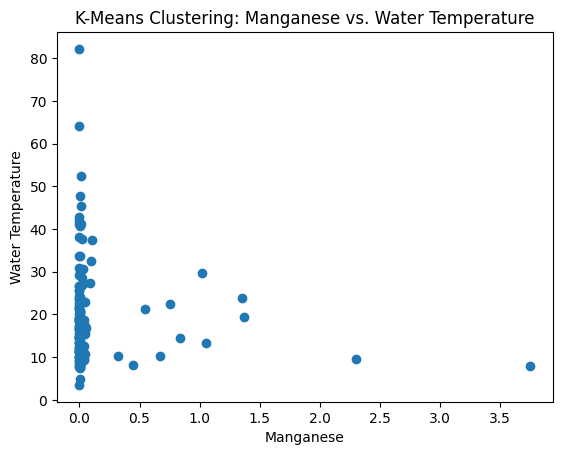

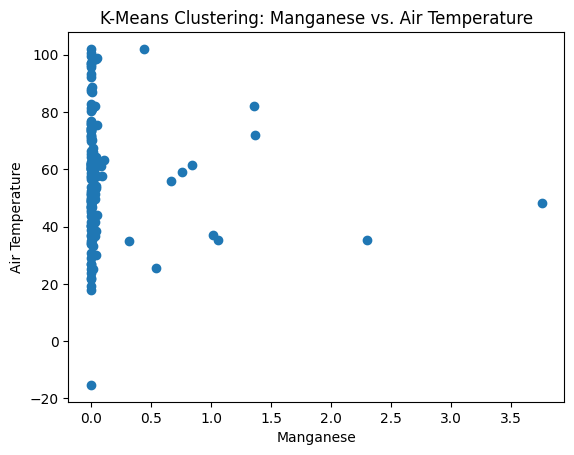

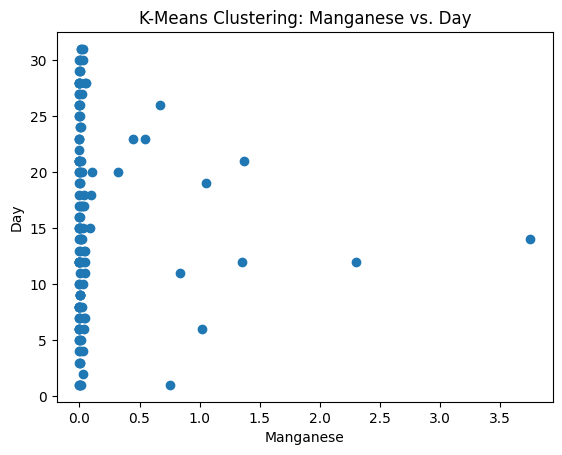

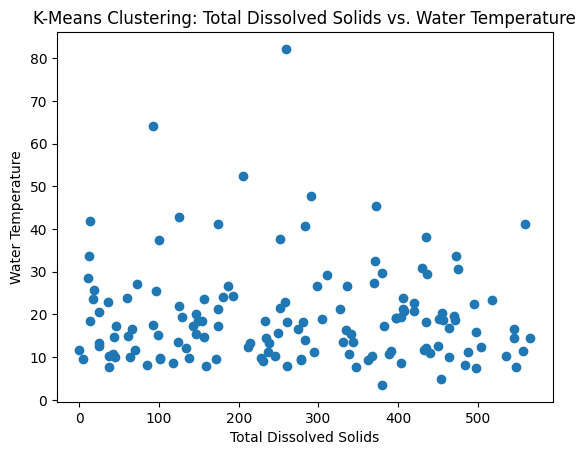

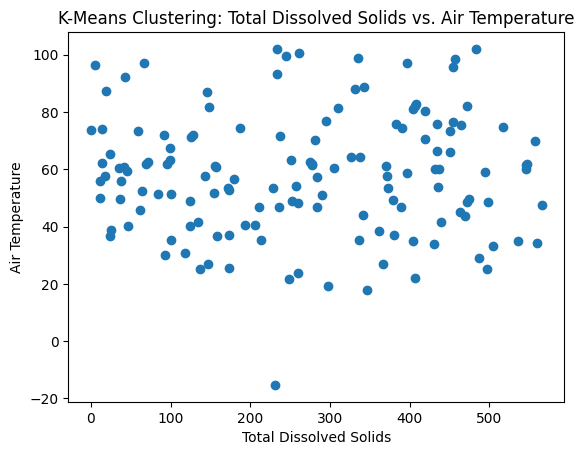

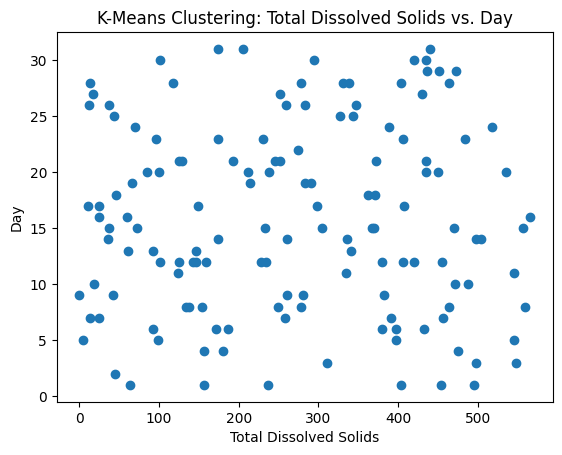

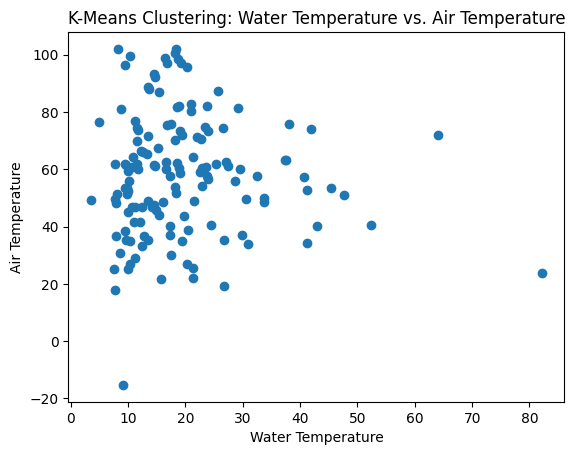

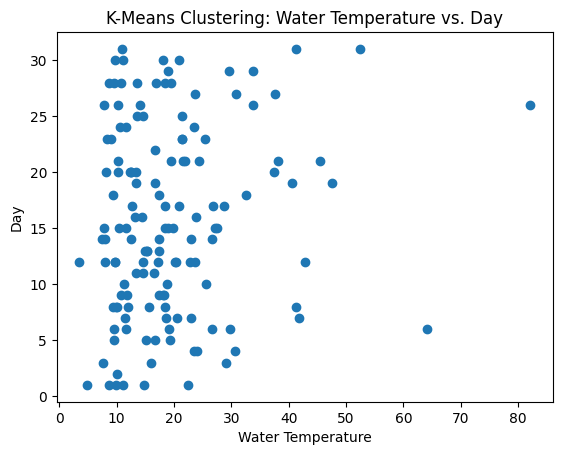

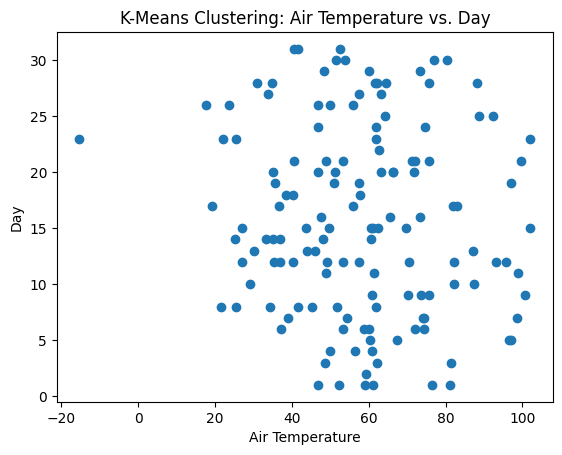

In [10]:


# List of all columns you want to create scatter plots for
columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Day']

# Create scatter plots for all pairs of columns
for pair in itertools.combinations(columns, 2):
    feature1, feature2 = pair
    plt.figure()
    plt.scatter(df[feature1], df[feature2])
    plt.title(f'K-Means Clustering: {feature1} vs. {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.show()

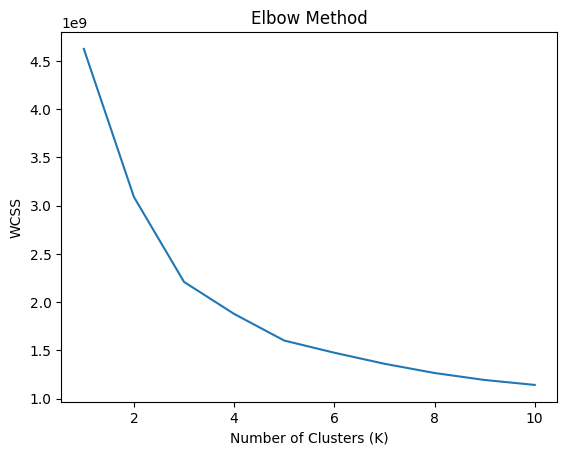

In [16]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Choose the optimal number of clusters (e.g., 3, 4, etc.) based on the Elbow Method
optimal_k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_assignments = kmeans.fit_predict(X)

# Add the cluster assignments to your DataFrame
df['Cluster'] = cluster_assignments

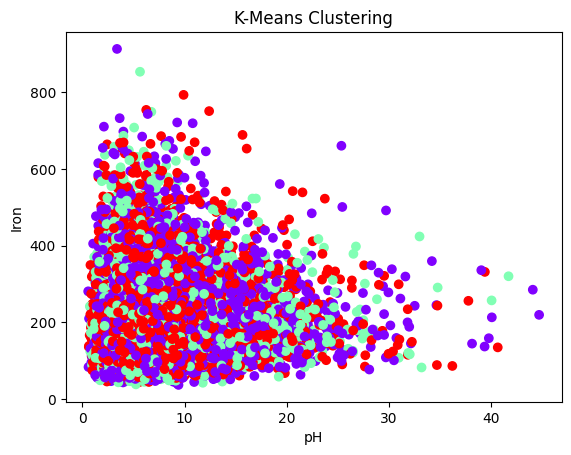

In [20]:
# Visualize the clusters (example for two features: pH and iron)
plt.scatter(X[:, 2], X[:, 3], c=cluster_assignments, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('pH')
plt.ylabel('Iron')
plt.show()